In [1]:
#KOSAZOSTAW

In [2]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with zipfile.ZipFile('dane.zip', 'r') as zip_ref:
    # Wypakuj plik ZIP
    zip_ref.extractall('./')
    
dane_opady = pd.read_csv('./dane.csv')
dane_opady

/var/folders/55/wv7nnx7s5j7gh_dntn2sctdh0000gn/T/ipykernel_44021/2646965701.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  dane_opady = pd.read_csv('./dane.csv')


Kod stacji Nazwa stacji   Rok  Miesiąc  Dzień  \
0         249180020   WARSZOWICE  1991        1      2   
1         249180020   WARSZOWICE  1991        1      3   
2         249180020   WARSZOWICE  1991        1      4   
3         249180020   WARSZOWICE  1991        1      7   
4         249180020   WARSZOWICE  1991        1     10   
...             ...          ...   ...      ...    ...   
3799790   254230020        SEJNY  2024        2     23   
3799791   254230020        SEJNY  2024        2     24   
3799792   254230020        SEJNY  2024        2     26   
3799793   254230020        SEJNY  2024        2     27   
3799794   254230020        SEJNY  2024        2     28   

         Suma dobowa opadów [mm]  Status pomiaru SMDB Rodzaj opadu [S/W/ ]  \
0                            5.5                  NaN                    W   
1                            3.5                  NaN                    W   
2                            1.9                  NaN                    W   
3                            3.3                  NaN                    W   
4                            0.0                  NaN                    W   
...                          ...                  ...                  ...   
3799790                      5.3                  NaN                    W   
3799791                      0.1                  NaN                    W   
3799792                      5.1                  NaN                    W   
3799793                      0.9                  NaN                    W   
3799794                      5.8                  NaN                    W   

         Wysokość pokrywy śnieżnej [cm]  Status pomiaru PKSN  \
0                                     0                  8.0   
1                                     0                  8.0   
2                                     0                  8.0   
3                                     0                  8.0   
4                                     0                  8.0   
...                                 ...                  ...   
3799790                               0                  9.0   
3799791                               0                  9.0   
3799792                               0                  9.0   
3799793                               0                  9.0   
3799794                               0                  9.0   

         Wysokość świeżospałego śniegu [cm]  Status pomiaru HSS  \
0                                         0                 8.0   
1                                         0                 8.0   
2                                         0                 8.0   
3                                         0                 8.0   
4                                         0                 8.0   
...                                     ...                 ...   
3799790                                   0                 8.0   
3799791                                   0                 8.0   
3799792                                   0                 8.0   
3799793                                   0                 8.0   
3799794                                   0                 8.0   

         Gatunek śniegu  [kod]  Status pomiaru GATS  \
0                          NaN                  8.0   
1                          NaN                  8.0   
2                          NaN                  8.0   
3                          NaN                  8.0   
4                          NaN                  8.0   
...                        ...                  ...   
3799790                    NaN                  8.0   
3799791                    NaN                  8.0   
3799792                    NaN                  8.0   
3799793                    NaN                  8.0   
3799794                    NaN                  8.0   

        Rodzaj pokrywy śnieżnej [kod]  Status pomiaru RPSN  
0                                 NaN                  8.0  
1                 

In [4]:
punkty_wewnatrz_malopolski = pd.read_csv('./punkty_wewnatrz_malopolski.csv')
punkty_wewnatrz_malopolski

ID            Nazwa      Rzeka Szerokość geograficzna  \
0    249200220          ROZTOKA    Dunajec               49 38 25   
1    249200240        PTASZKOWA    Łubinka               49 36 01   
2    249200260            ŁĄCKO    Dunajec               49 33 35   
3    249200270          TURBACZ       Raba               49 32 41   
4    249200280           ŁABOWA  Kamienica               49 31 34   
..         ...              ...        ...                    ...   
105  250190790         CHRZANÓW        NaN               50 06 45   
106  249210370     ROPICA GÓRNA        NaN               49 35 46   
107  249190980  SUCHA BESKIDZKA        NaN               49 45 14   
108  249201060        TYLMANOWA  Ochotnica               49 31 05   
109  249210420      SMEREKOWIEC       Ropa               49 25 01   

    Długość geograficzna Wysokość n.p.m.  \
0               20 23 00             815   
1               20 53 12             520   
2               20 26 22             366   
3               20 07 05           1 273   
4               20 51 31             455   
..                   ...             ...   
105             19 22 36             251   
106             21 13 53             356   
107             19 36 21             324   
108             20 23 15             404   
109             21 12 13             560   

                                          geometry  index_right  
0    POINT (20.383333333333333 49.640277777777776)            0  
1     POINT (20.886666666666667 49.60027777777778)            0  
2     POINT (20.439444444444444 49.55972222222222)            0  
3     POINT (20.118055555555557 49.54472222222222)            0  
4     POINT (20.858611111111113 49.52611111111111)            0  
..                                             ...          ...  
105   POINT (19.37666666666667 50.112500000000004)            0  
106  POINT (21.231388888888887 49.596111111111114)            0  
107   POINT (19.605833333333333 49.75388888888889)            0  
108             POINT (20.3875 49.518055555555556)            0  
109   POINT (21.203611111111112 49.41694444444444)            0  

[110 rows x 8 columns]

In [5]:
opady_malopolska = pd.merge(dane_opady, punkty_wewnatrz_malopolski, left_on='Kod stacji', right_on='ID', how='inner')
opady_malopolska = opady_malopolska.drop(columns=['Nazwa stacji', 'ID'])
opady_malopolska['Data'] = pd.to_datetime(opady_malopolska['Rok'].astype(str) + '-' + opady_malopolska['Miesiąc'].astype(str) + '-' + opady_malopolska['Dzień'].astype(str), format='%Y-%m-%d')
opady_malopolska = opady_malopolska.drop(columns=['Rok', 'Miesiąc', 'Dzień'])

opady_malopolska = opady_malopolska[['Kod stacji', 'Nazwa', 'Suma dobowa opadów [mm]', 'Data', 'Szerokość geograficzna', 'Długość geograficzna', 'geometry', 'Rzeka'] + [col for col in opady_malopolska.columns if col not in ['Kod stacji', 'Nazwa', 'Suma dobowa opadów [mm]', 'Data', 'Szerokość geograficzna', 'Długość geograficzna', 'geometry', 'Rzeka']]]
opady_malopolska

Kod stacji        Nazwa  Suma dobowa opadów [mm]       Data  \
0        249190010  JAWISZOWICE                      0.1 1991-01-01   
1        249190010  JAWISZOWICE                      2.4 1991-01-02   
2        249190010  JAWISZOWICE                      4.7 1991-01-03   
3        249190010  JAWISZOWICE                      2.6 1991-01-04   
4        249190010  JAWISZOWICE                      0.0 1991-01-05   
...            ...          ...                      ...        ...   
177011   250200230     BORUSOWA                      0.0 2024-02-21   
177012   250200230     BORUSOWA                      0.3 2024-02-22   
177013   250200230     BORUSOWA                      2.3 2024-02-23   
177014   250200230     BORUSOWA                      0.0 2024-02-26   
177015   250200230     BORUSOWA                      0.0 2024-02-27   

       Szerokość geograficzna Długość geograficzna  \
0                    49 57 35             19 08 31   
1                    49 57 35             19 08 31   
2                    49 57 35             19 08 31   
3                    49 57 35             19 08 31   
4                    49 57 35             19 08 31   
...                       ...                  ...   
177011               50 16 40             20 47 13   
177012               50 16 40             20 47 13   
177013               50 16 40             20 47 13   
177014               50 16 40             20 47 13   
177015               50 16 40             20 47 13   

                                             geometry  Rzeka  \
0       POINT (19.141944444444444 49.959722222222226)  Wisła   
1       POINT (19.141944444444444 49.959722222222226)  Wisła   
2       POINT (19.141944444444444 49.959722222222226)  Wisła   
3       POINT (19.141944444444444 49.959722222222226)  Wisła   
4       POINT (19.141944444444444 49.959722222222226)  Wisła   
...                                               ...    ...   
177011   POINT (20.786944444444448 50.27777777777778)  Wisła   
177012   POINT (20.786944444444448 50.27777777777778)  Wisła   
177013   POINT (20.786944444444448 50.27777777777778)  Wisła   
177014   POINT (20.786944444444448 50.27777777777778)  Wisła   
177015   POINT (20.786944444444448 50.27777777777778)  Wisła   

        Status pomiaru SMDB Rodzaj opadu [S/W/ ]  \
0                       NaN                    W   
1                       NaN                    W   
2                       NaN                    W   
3                       NaN                    W   
4                       NaN                    W   
...                     ...                  ...   
177011                  NaN                    W   
177012                  NaN                    W   
177013                  NaN                    W   
177014                  NaN                    W   
177015                  NaN                    W   

        Wysokość pokrywy śnieżnej [cm]  Status pomiaru PKSN  \
0                                    0                  8.0   
1                                    0                  8.0   
2                                    0                  8.0   
3                                    0                  8.0   
4                                    0                  8.0   
...                                ...                  ...   
177011                               0                  9.0   
177012                               0                  9.0   
177013                               0                  9.0   
177014                               0                  9.0   
177015                               0                  9.0   

        Wysokość świeżospałego śniegu [cm]  Status pomiaru HSS  \
0                                        0                 8.0   
1                                        0                 8.0   
2                                        0                 8.0   
3                                        0                 8.0   
4                        

In [6]:
opady_malopolska = opady_malopolska.drop_duplicates()

In [7]:
nan_counts = opady_malopolska.isna().sum()
nan_counts


Kod stacji                                 0
Nazwa                                      0
Suma dobowa opadów [mm]                    0
Data                                       0
Szerokość geograficzna                     0
Długość geograficzna                       0
geometry                                   0
Rzeka                                   4791
Status pomiaru SMDB                   162021
Rodzaj opadu [S/W/ ]                   15017
Wysokość pokrywy śnieżnej [cm]             0
Status pomiaru PKSN                    31686
Wysokość świeżospałego śniegu [cm]         0
Status pomiaru HSS                     17317
Gatunek śniegu  [kod]                 144453
Status pomiaru GATS                    32624
Rodzaj pokrywy śnieżnej [kod]         110929
Status pomiaru RPSN                    92979
Wysokość n.p.m.                            0
index_right                                0
dtype: int64

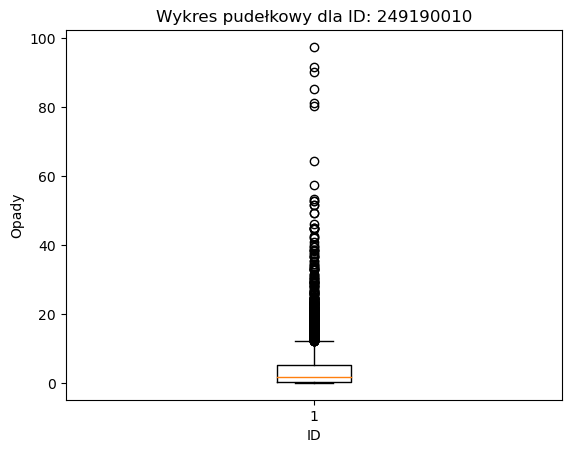

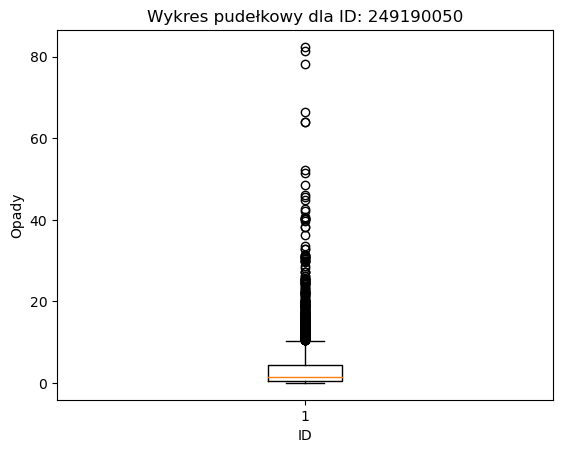

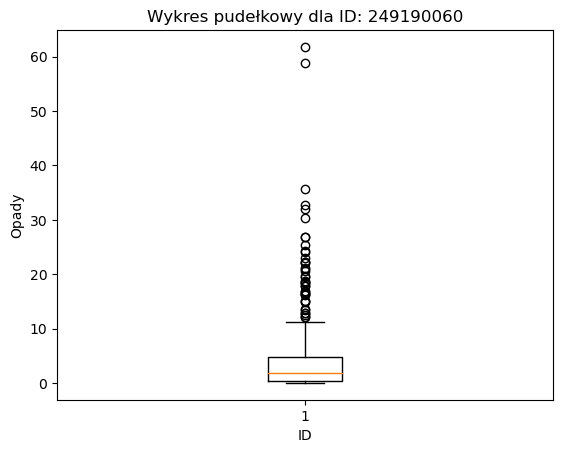

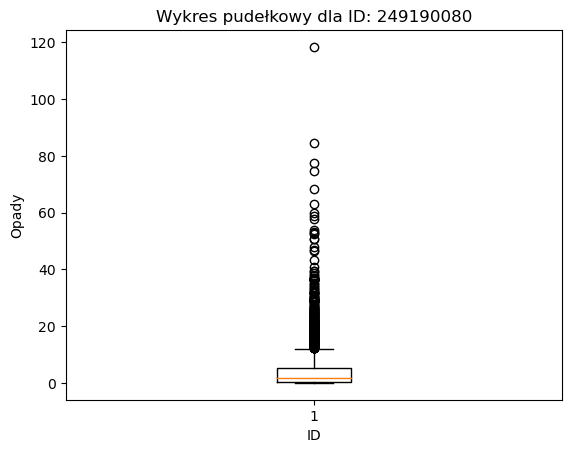

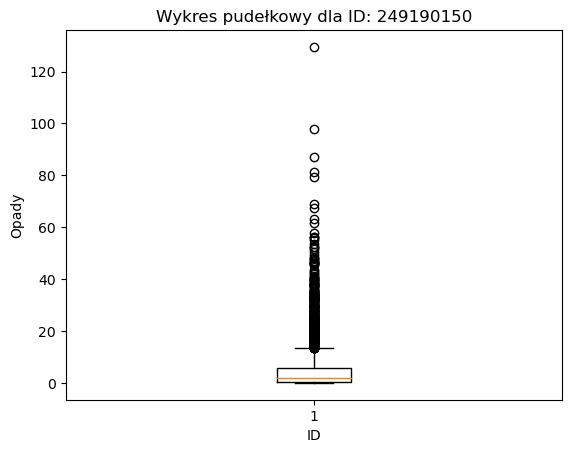

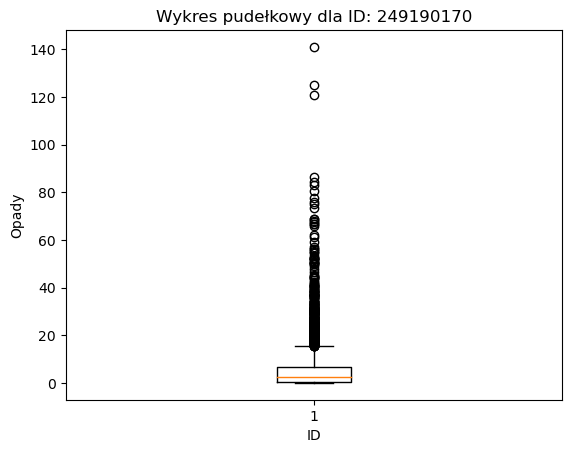

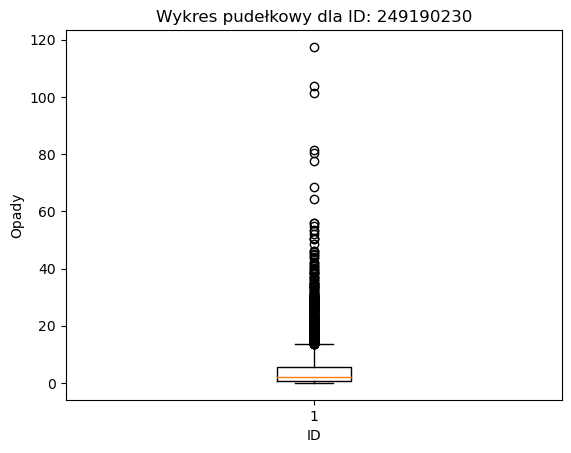

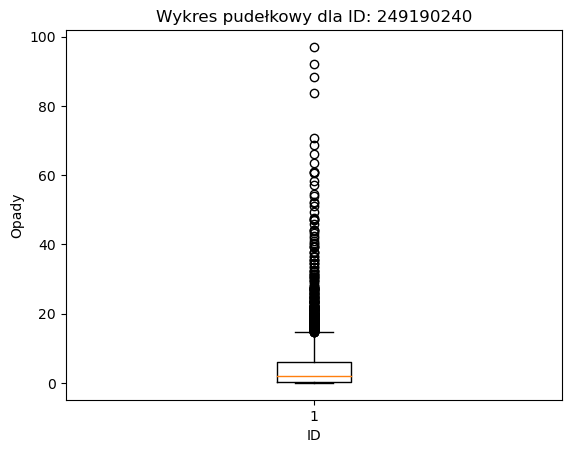

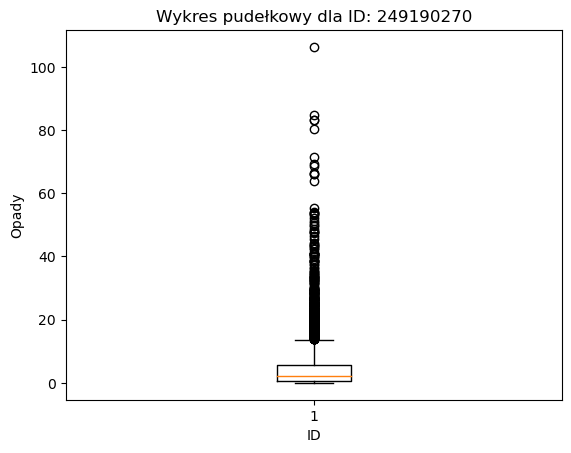

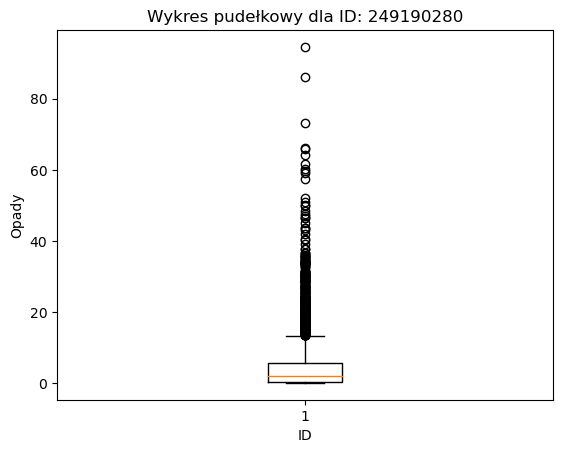

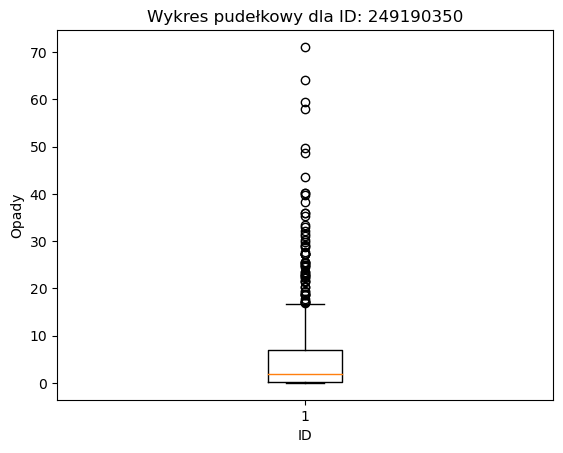

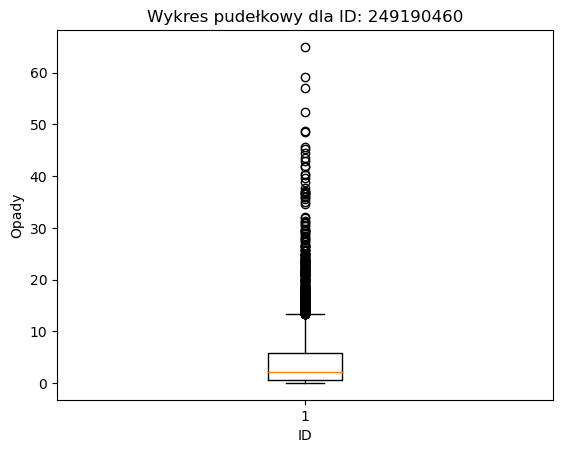

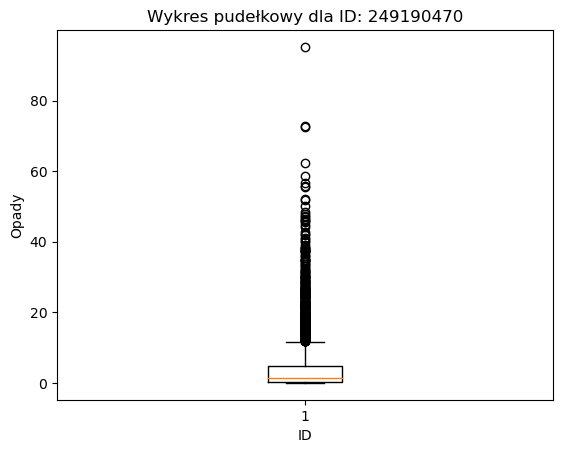

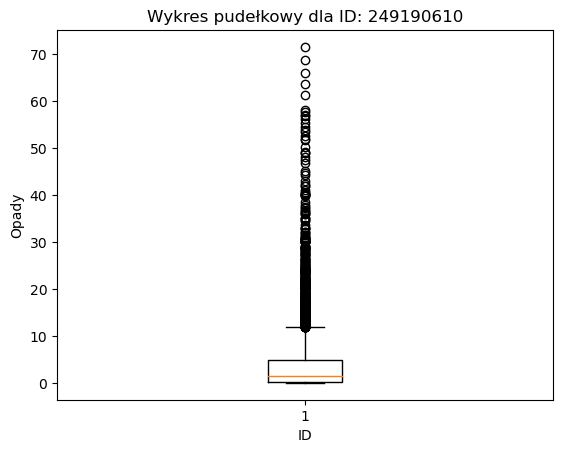

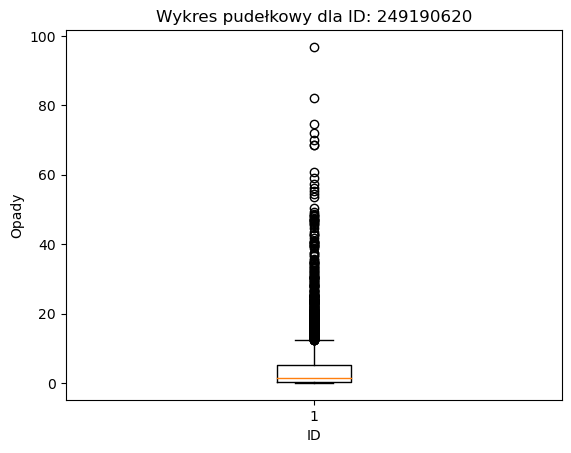

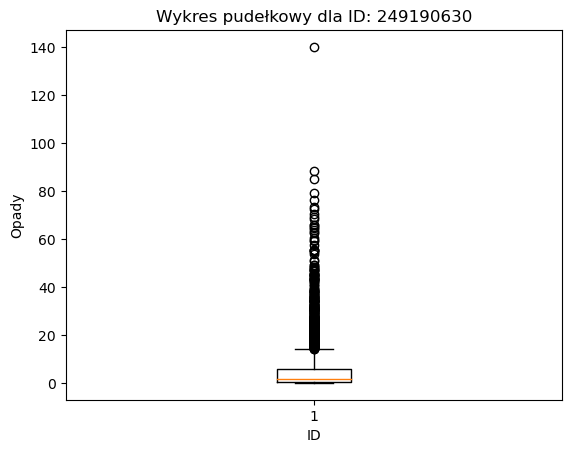

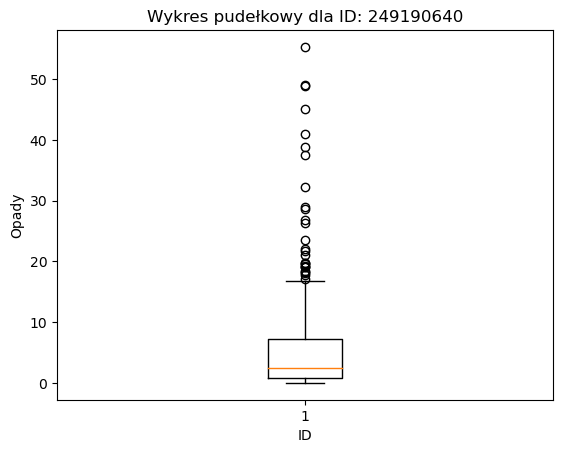

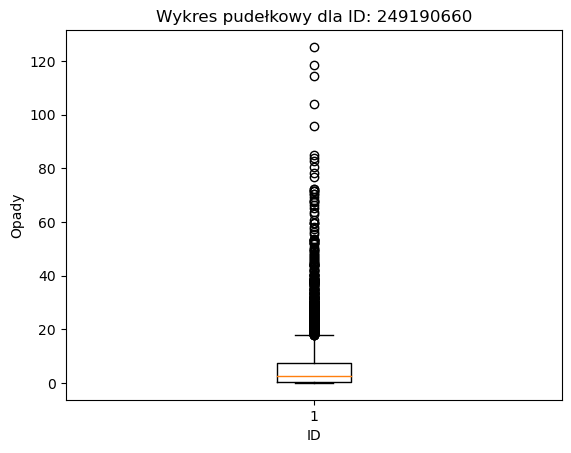

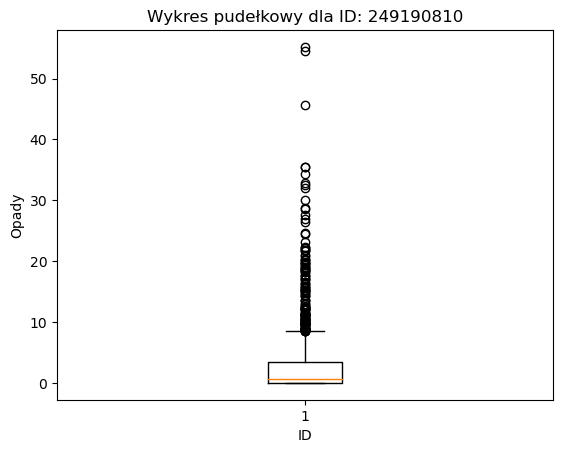

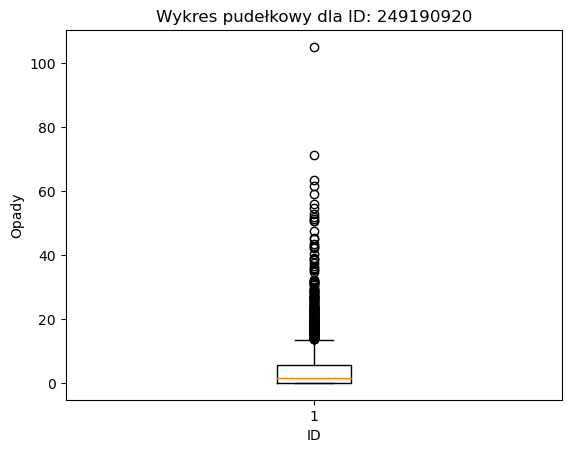

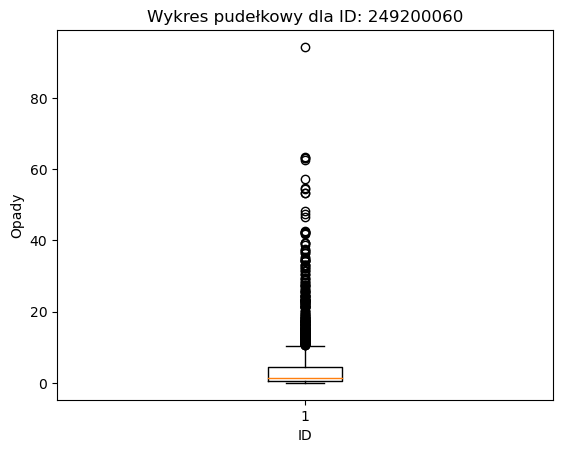

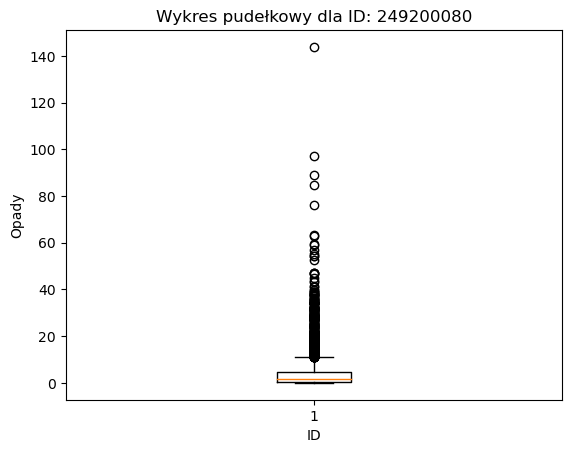

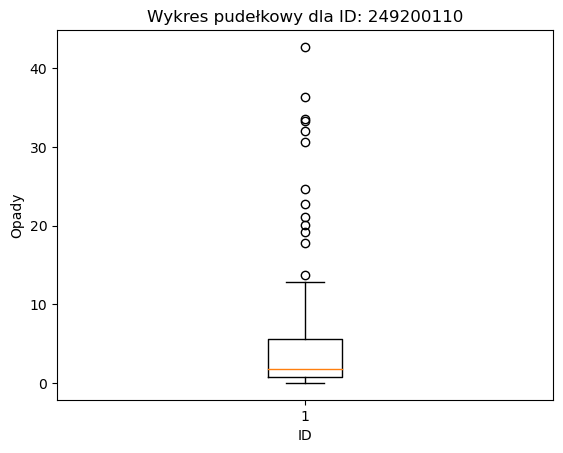

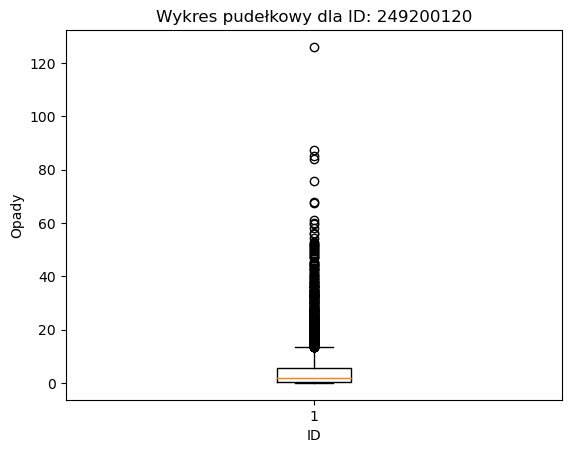

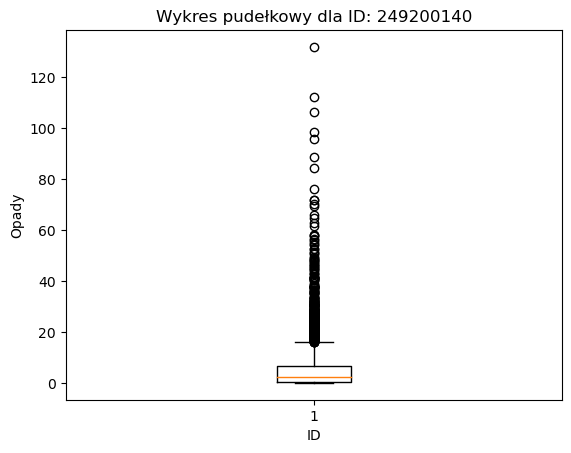

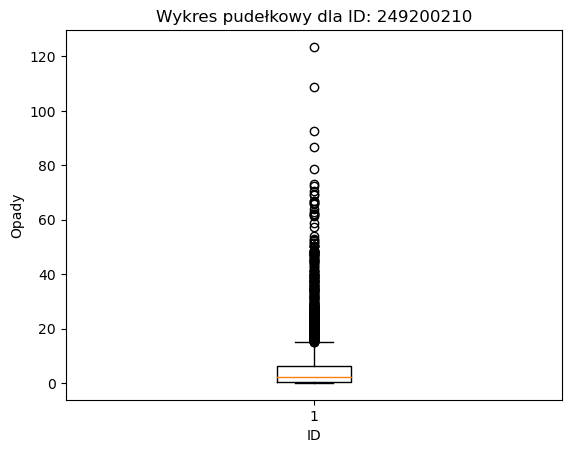

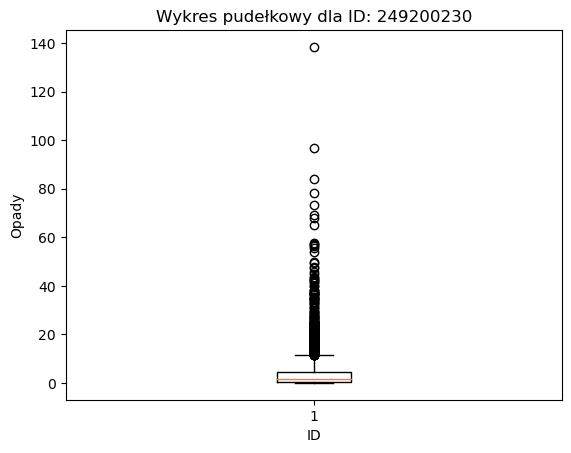

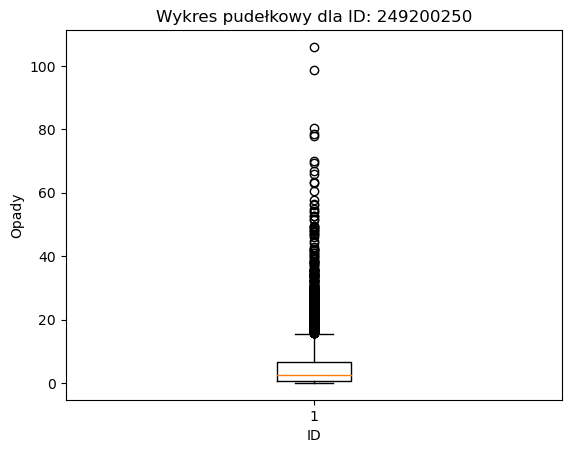

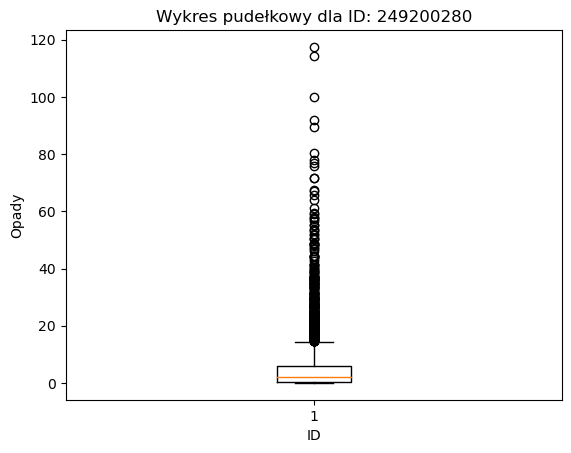

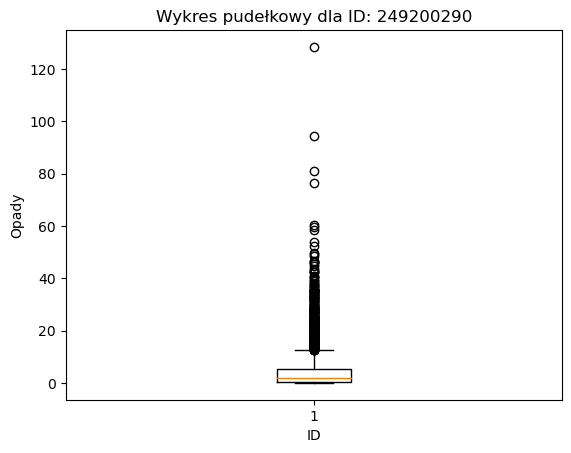

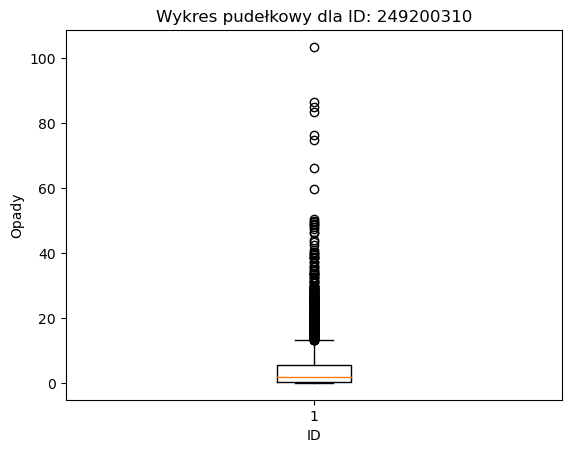

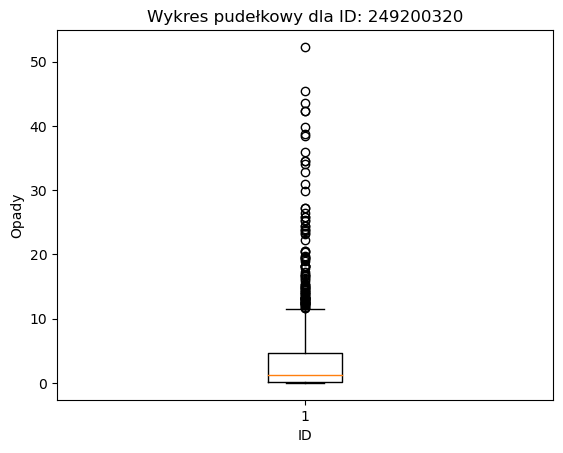

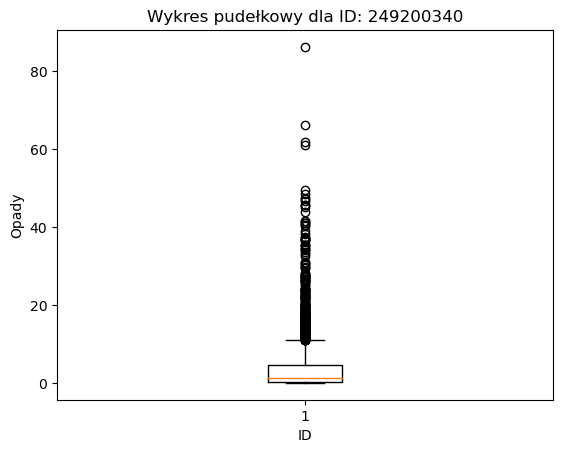

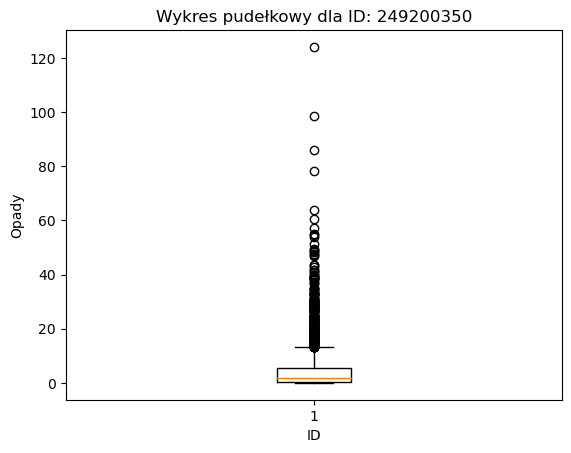

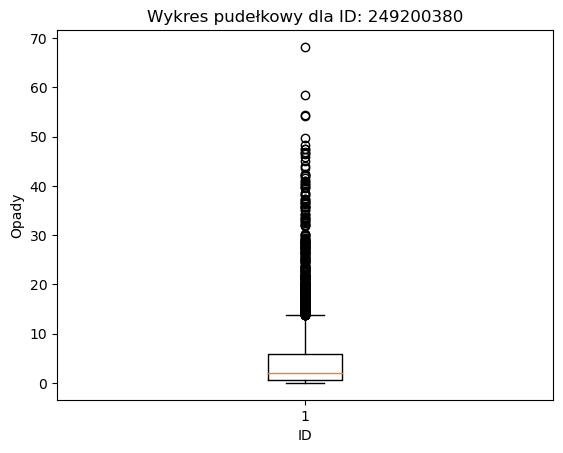

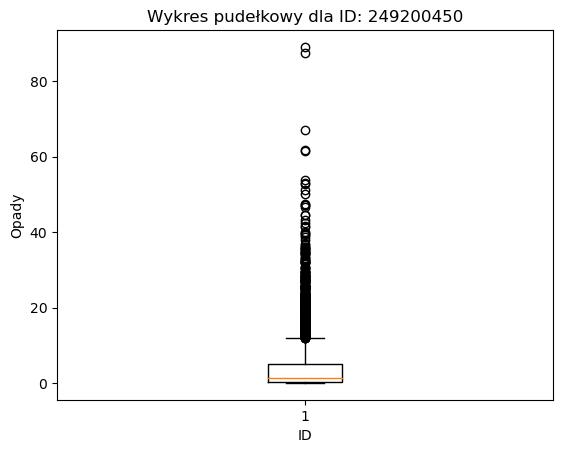

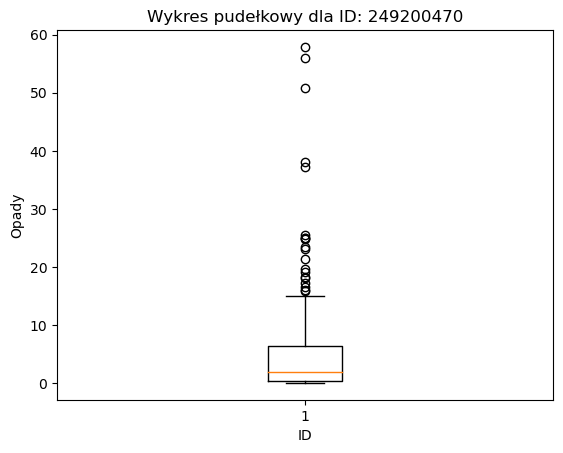

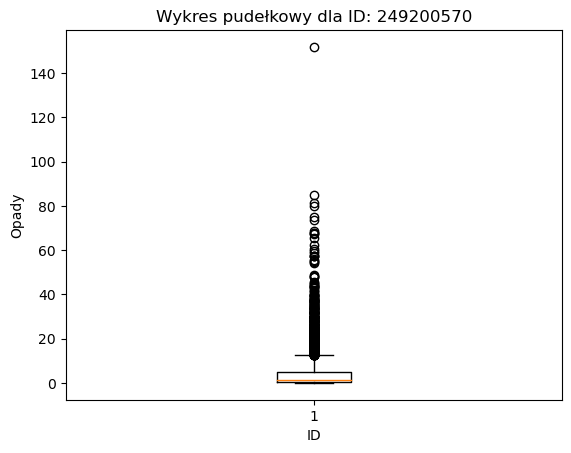

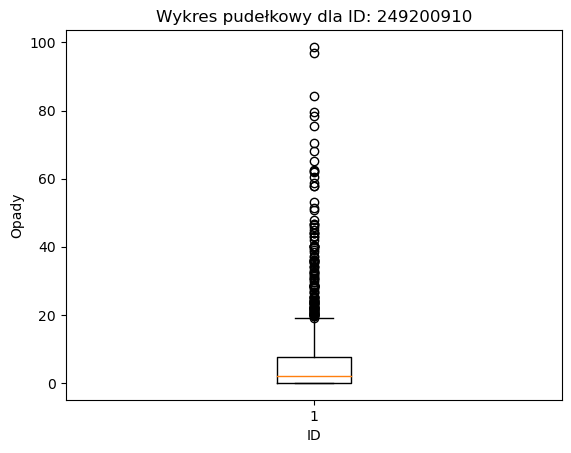

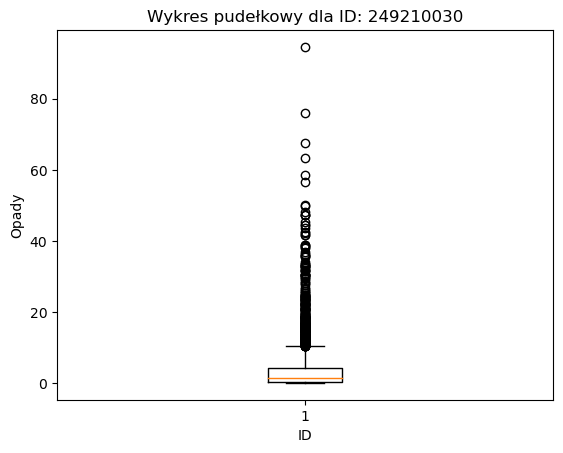

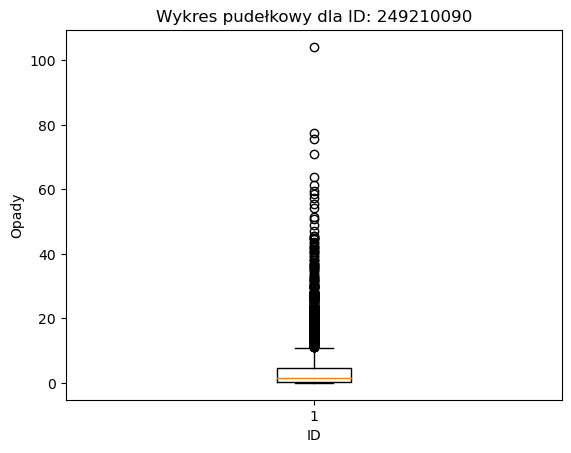

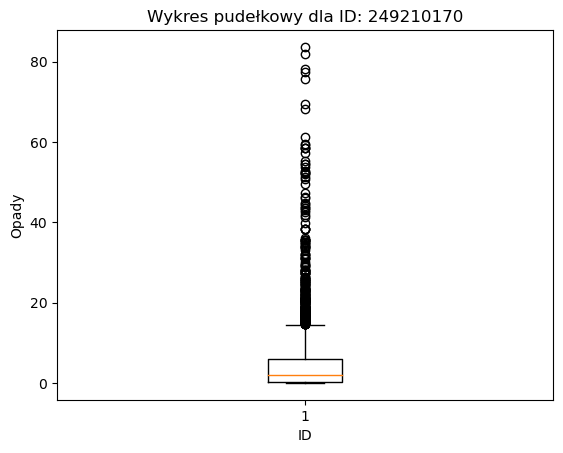

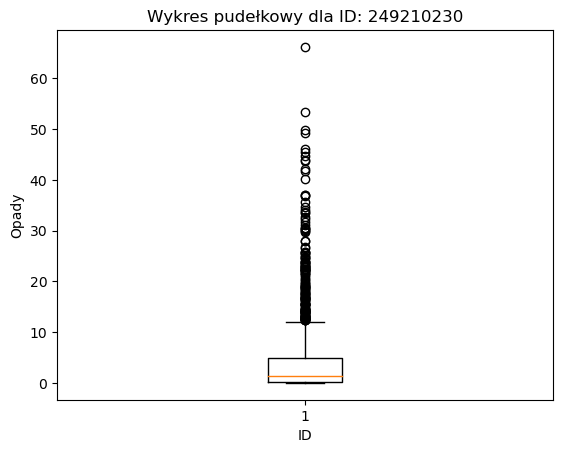

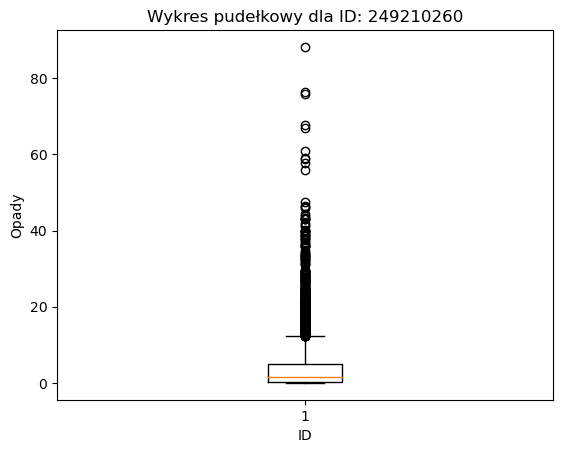

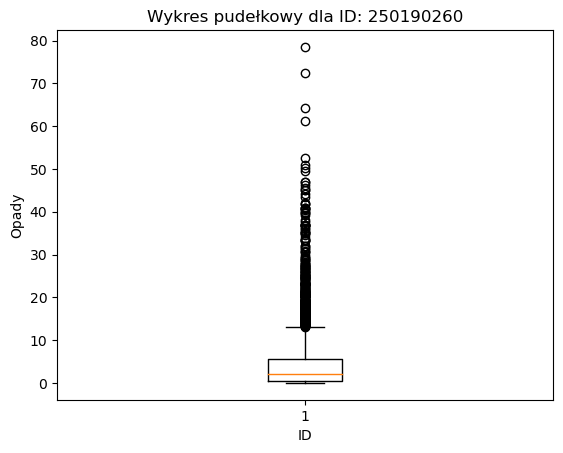

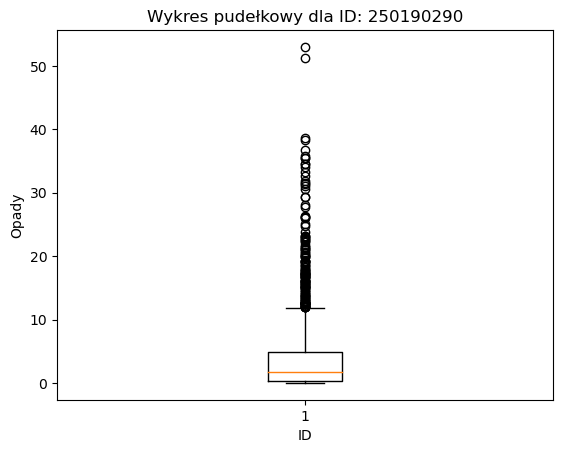

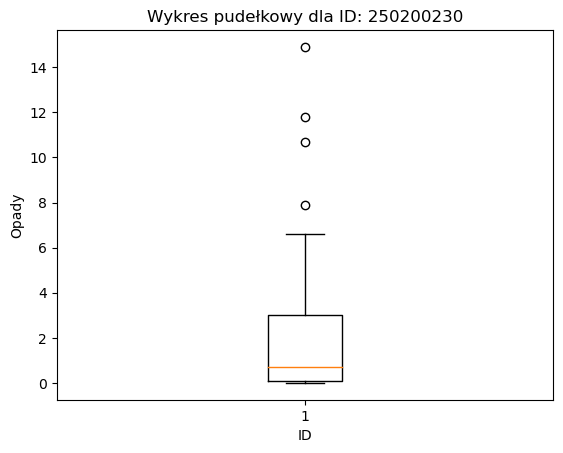

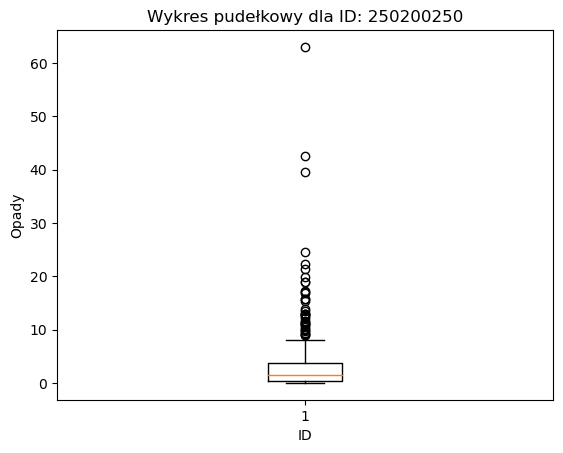

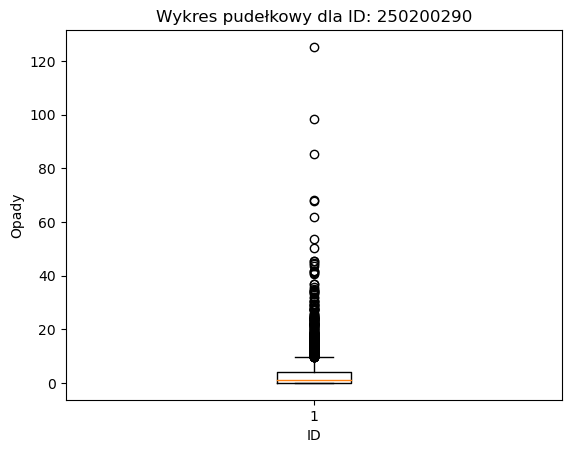

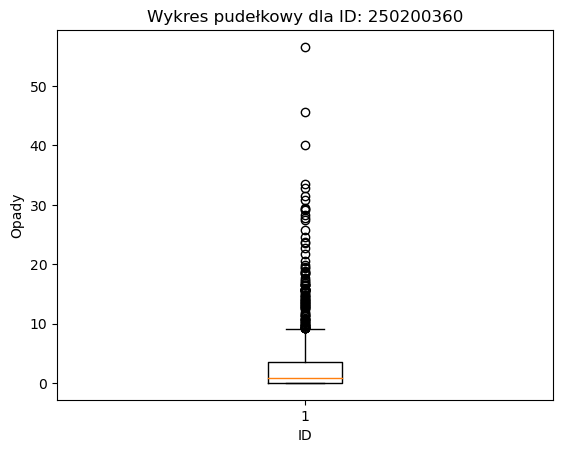

In [8]:
grouped = opady_malopolska.groupby('Kod stacji')
for group_name, group_data in grouped:
    plt.figure()
    plt.boxplot(group_data['Suma dobowa opadów [mm]'])
    plt.title(f'Wykres pudełkowy dla ID: {group_name}')
    plt.xlabel('ID')
    plt.ylabel('Opady')
    plt.show()

In [9]:
opady_malopolska.describe()

Kod stacji  Suma dobowa opadów [mm]  Status pomiaru SMDB  \
count  1.770160e+05            177016.000000         14995.000000   
mean   2.492602e+08                 4.528647             8.942447   
std    2.434121e+05                 7.632774             0.232903   
min    2.491900e+08                 0.000000             8.000000   
25%    2.491905e+08                 0.300000             9.000000   
50%    2.492001e+08                 1.800000             9.000000   
75%    2.492004e+08                 5.400000             9.000000   
max    2.502004e+08               151.800000             9.000000   

       Wysokość pokrywy śnieżnej [cm]  Status pomiaru PKSN  \
count                   177016.000000        145330.000000   
mean                         2.971912             8.388936   
std                         10.358016             0.487510   
min                          0.000000             8.000000   
25%                          0.000000             8.000000   
50%                          0.000000             8.000000   
75%                          0.000000             9.000000   
max                        180.000000             9.000000   

       Wysokość świeżospałego śniegu [cm]  Status pomiaru HSS  \
count                       177016.000000       159699.000000   
mean                             0.339416            8.215318   
std                              1.803603            0.411044   
min                              0.000000            8.000000   
25%                              0.000000            8.000000   
50%                              0.000000            8.000000   
75%                              0.000000            8.000000   
max                             75.000000            9.000000   

       Gatunek śniegu  [kod]  Status pomiaru GATS  Status pomiaru RPSN  \
count           32563.000000        144392.000000         84037.000000   
mean                3.575715             8.132189             8.000012   
std                 1.891927             0.338697             0.003450   
min                 0.000000             8.000000             8.000000   
25%                 1.000000             8.000000             8.000000   
50%                 4.000000             8.000000             8.000000   
75%                 5.000000             8.000000             8.000000   
max                 9.000000             9.000000             9.000000   

       index_right  
count     177016.0  
mean           0.0  
std            0.0  
min            0.0  
25%            0.0  
50%            0.0  
75%            0.0  
max            0.0

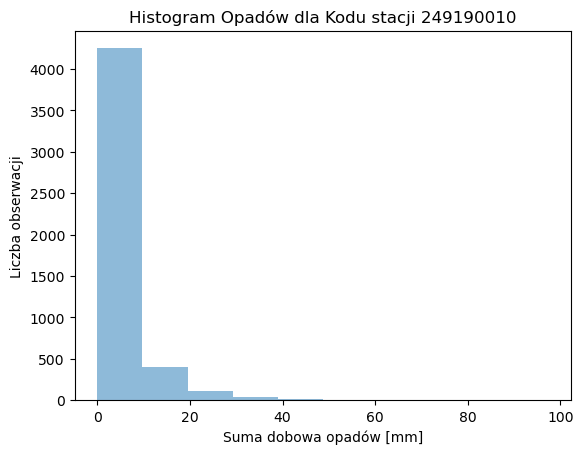

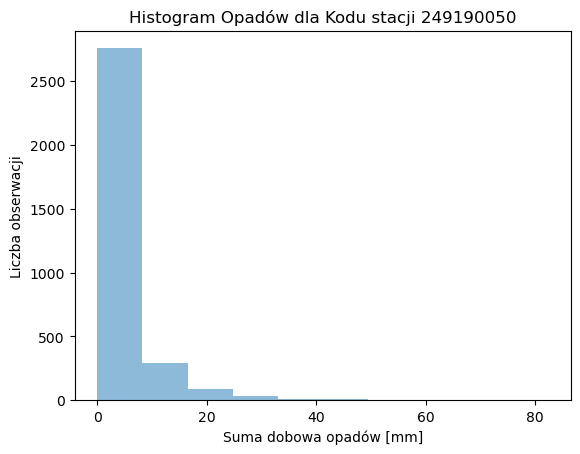

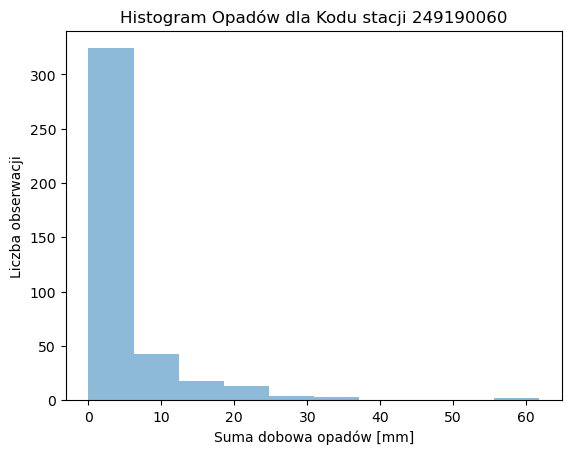

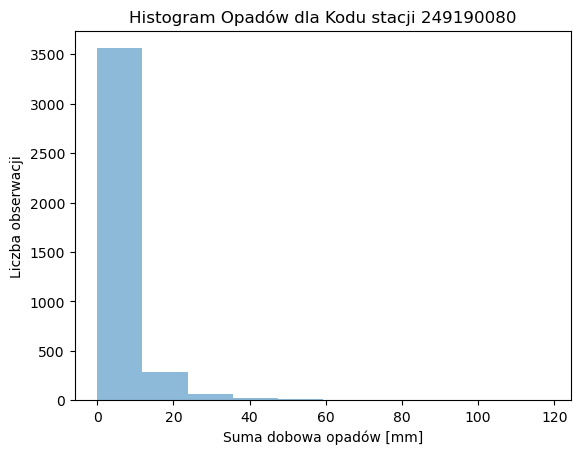

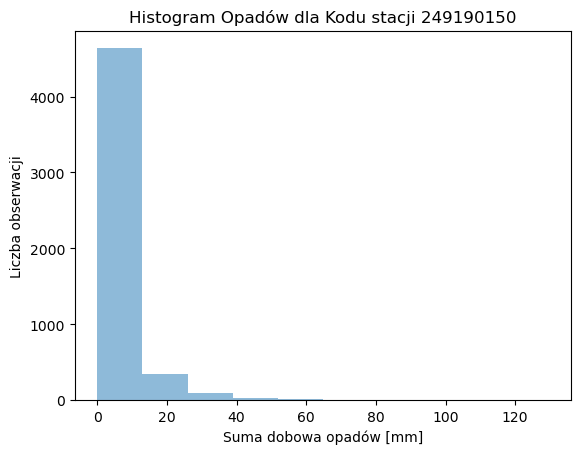

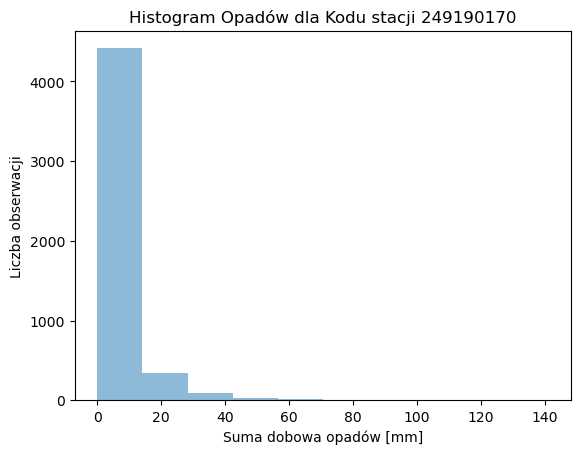

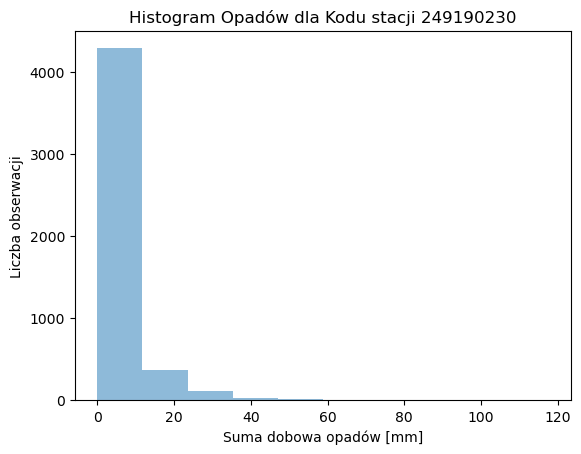

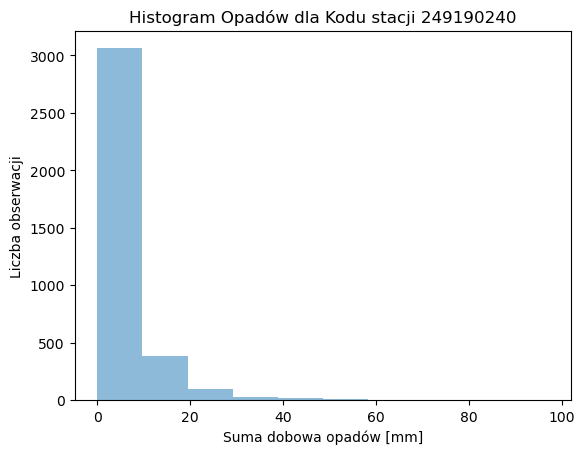

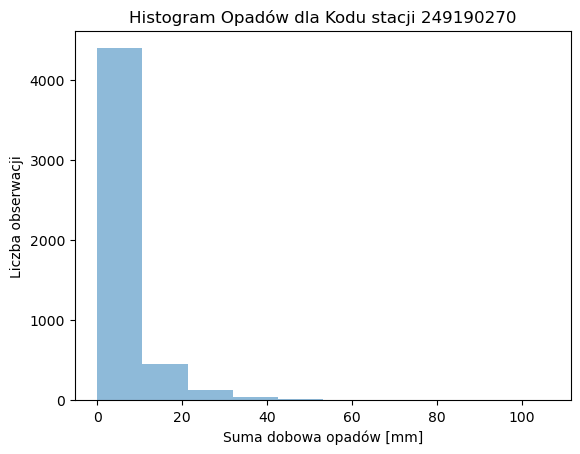

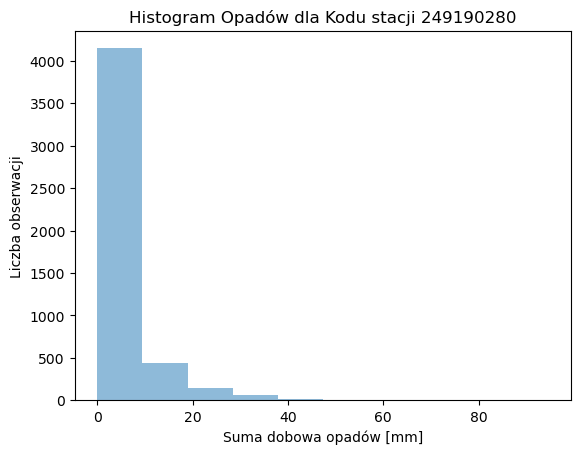

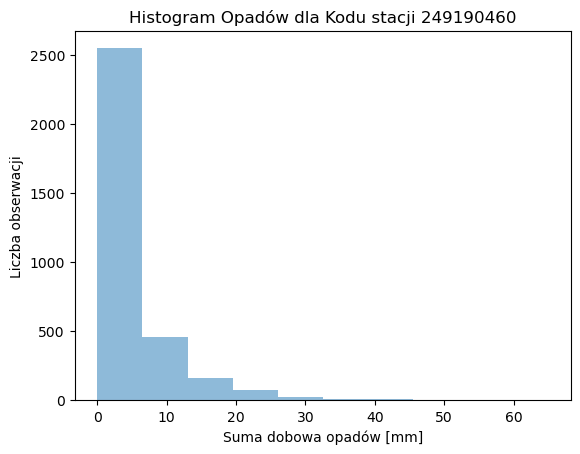

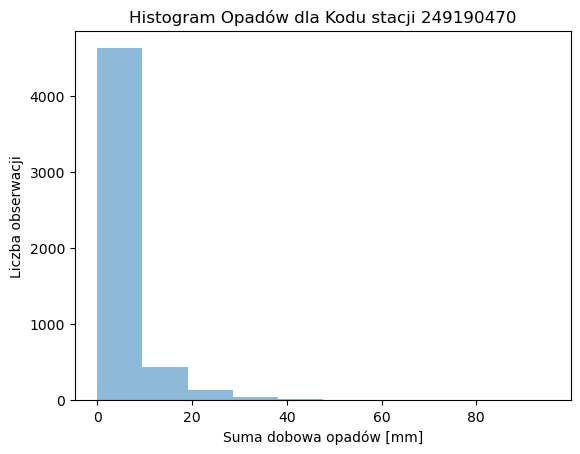

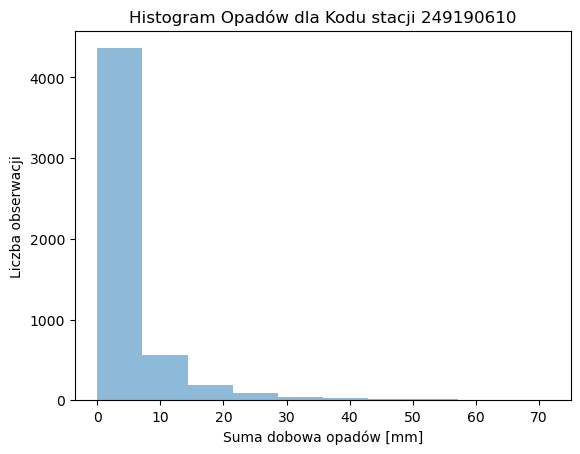

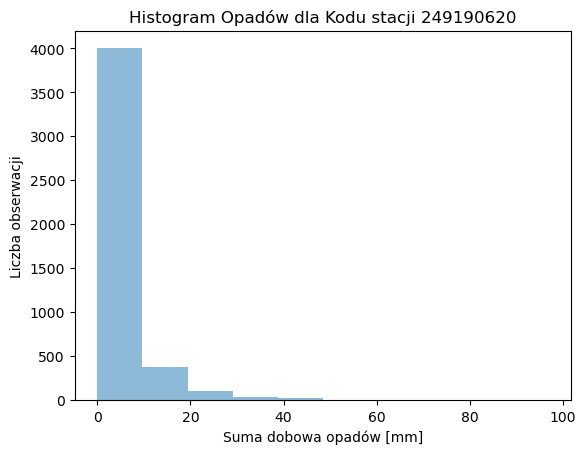

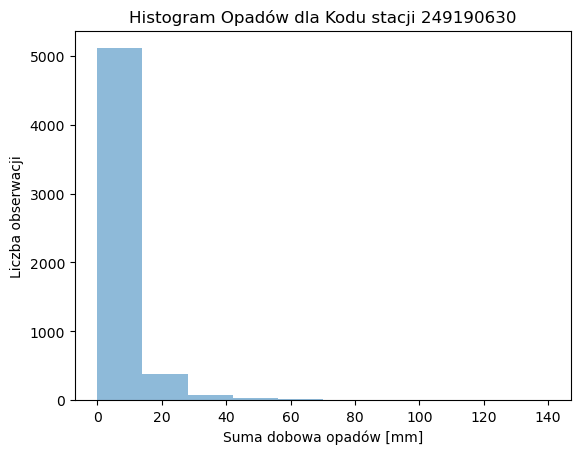

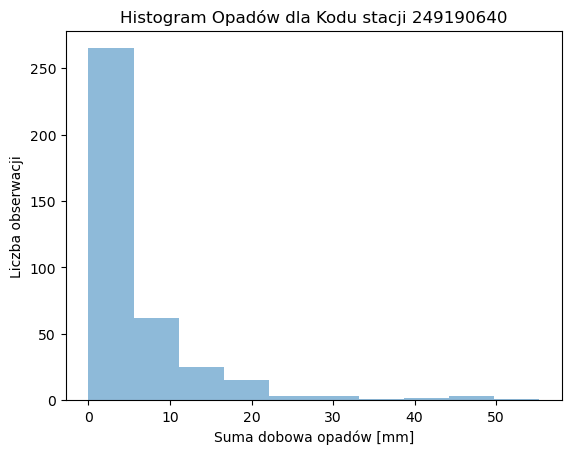

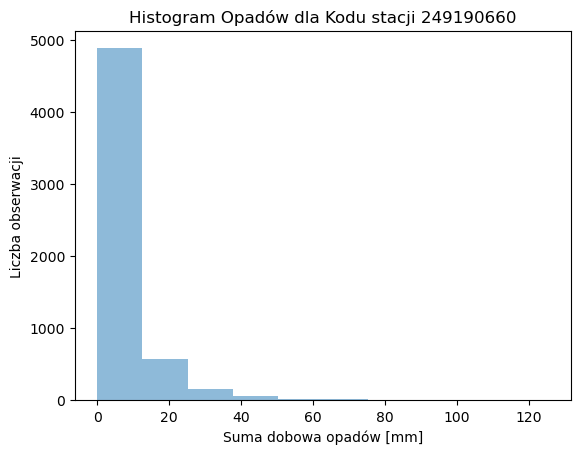

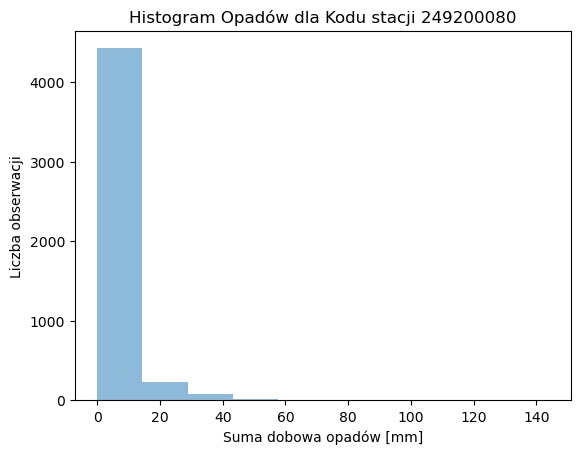

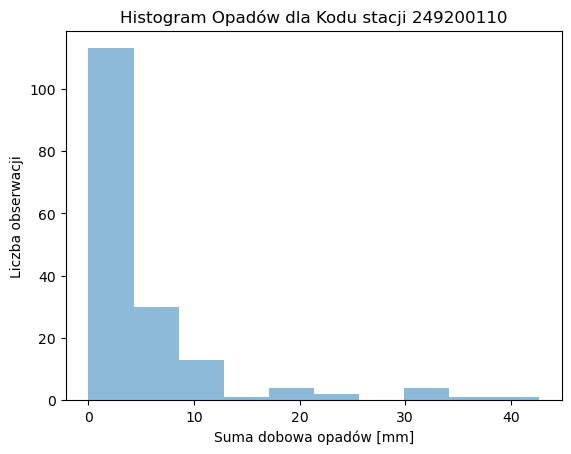

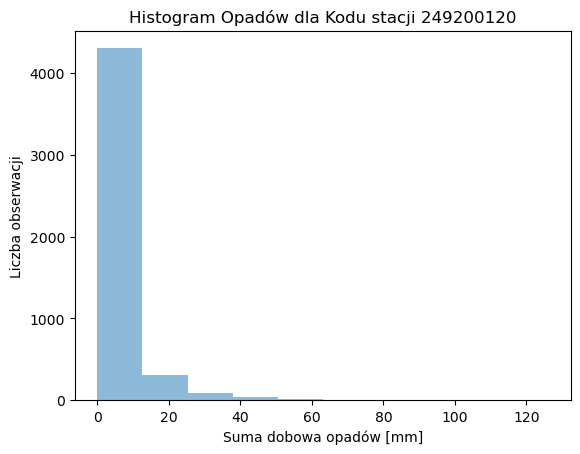

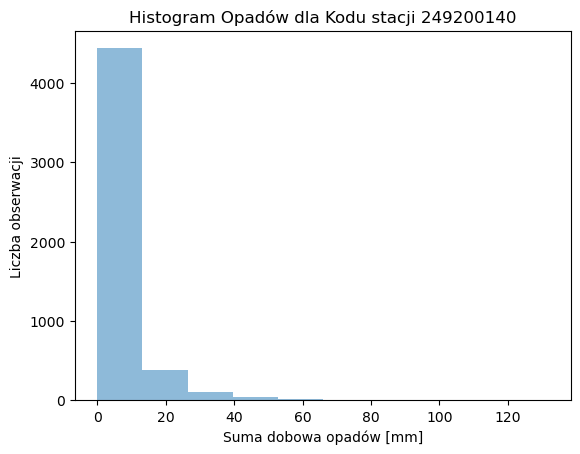

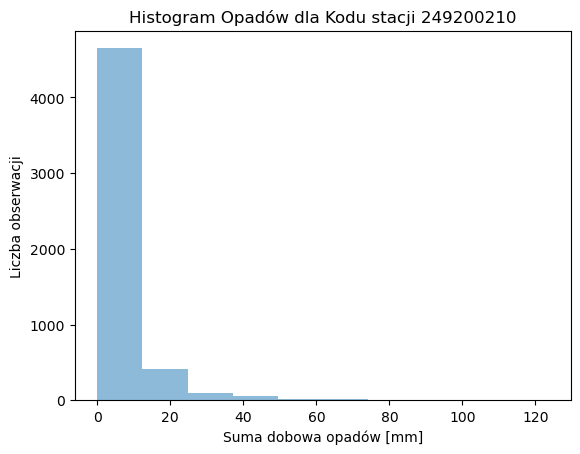

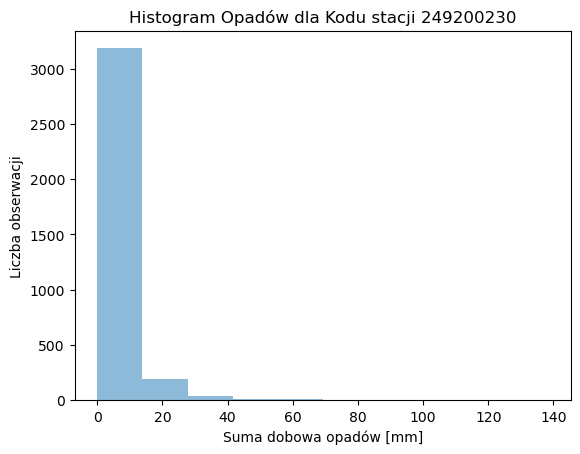

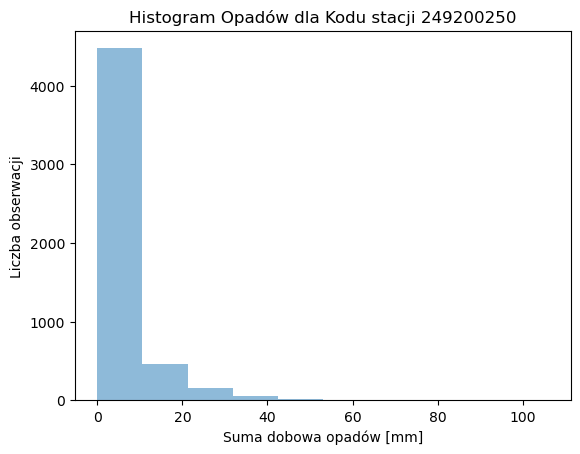

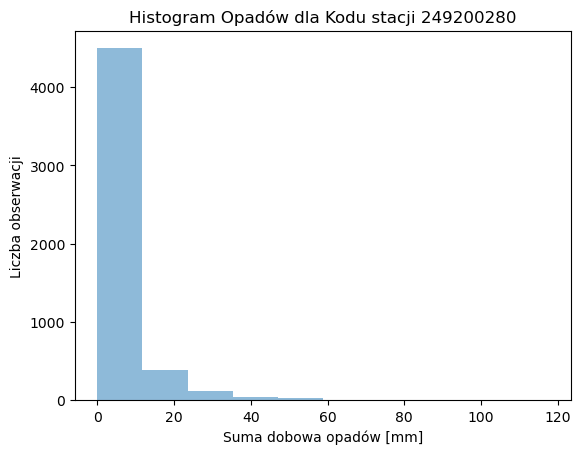

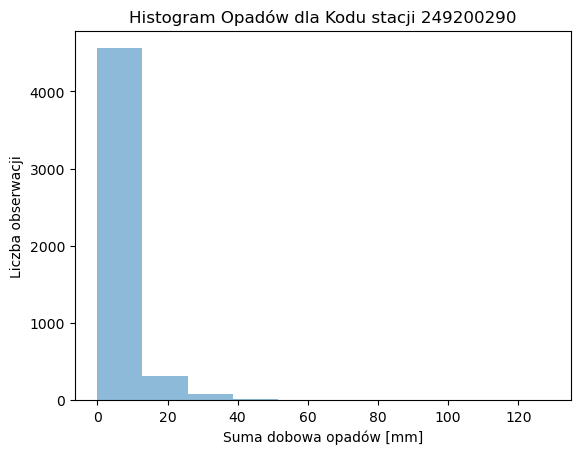

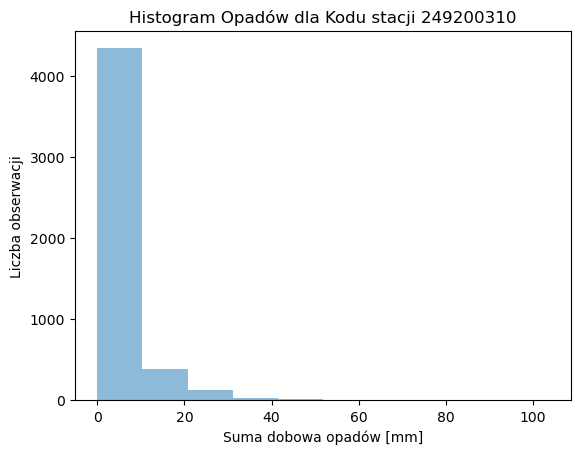

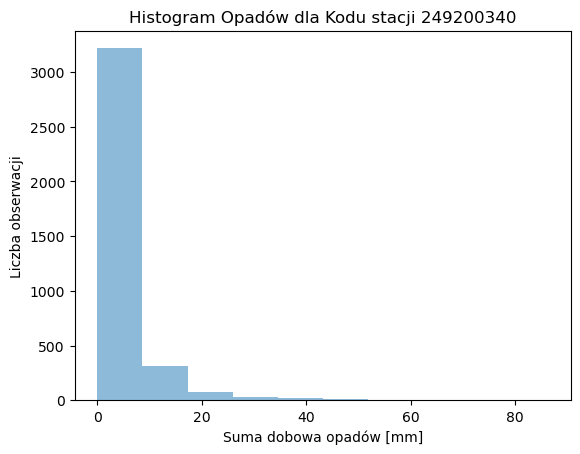

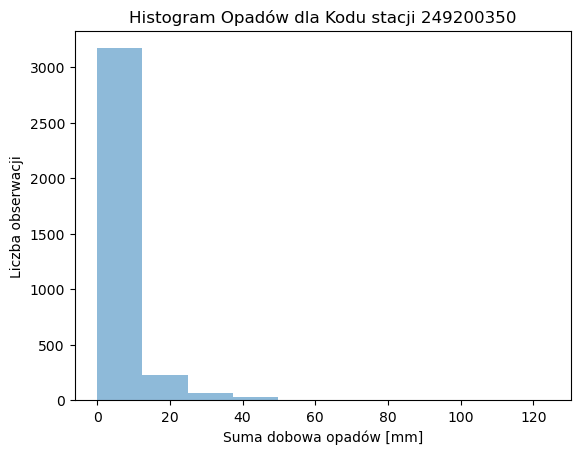

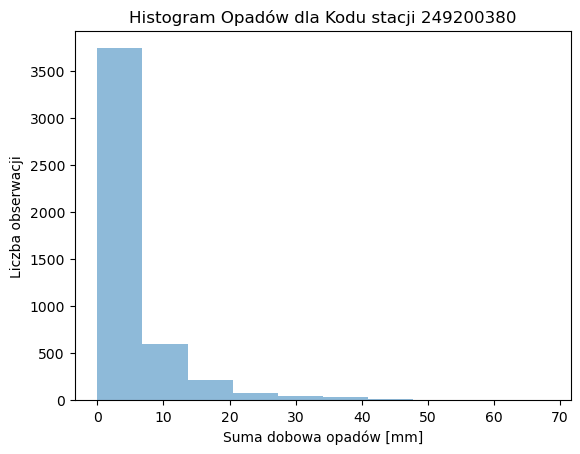

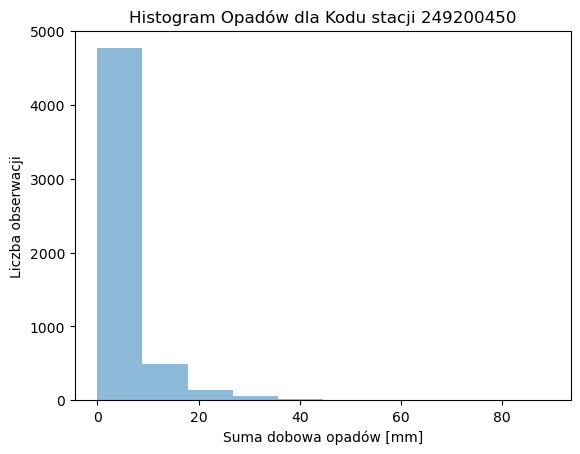

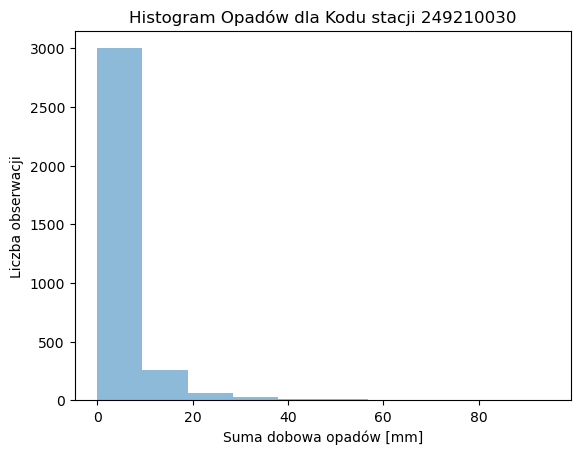

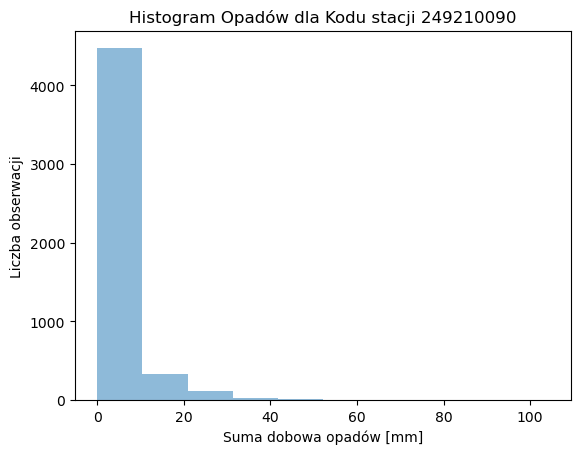

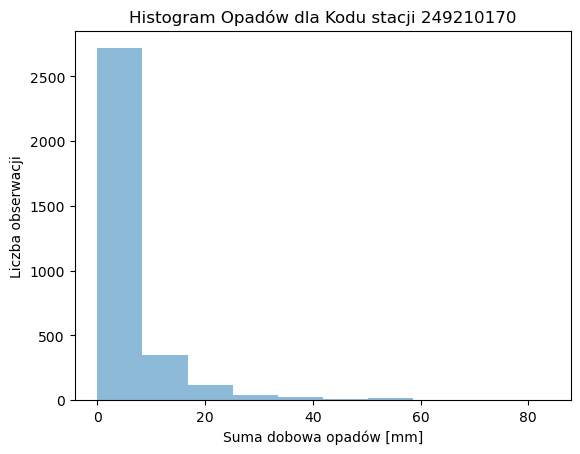

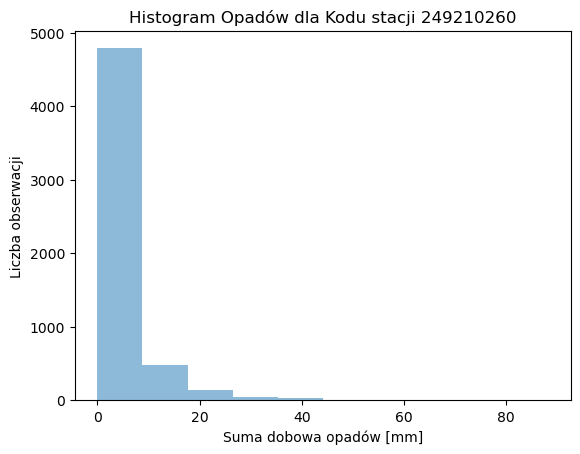

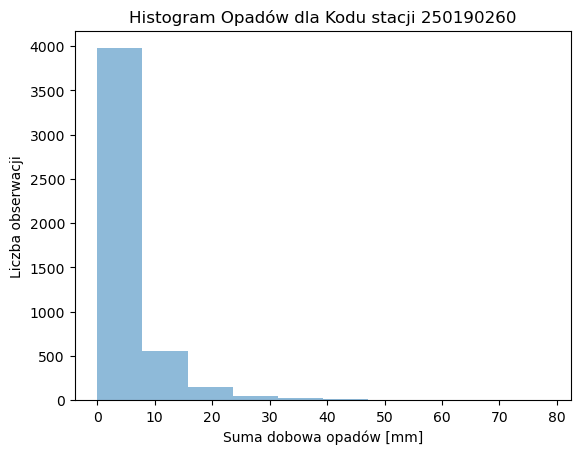

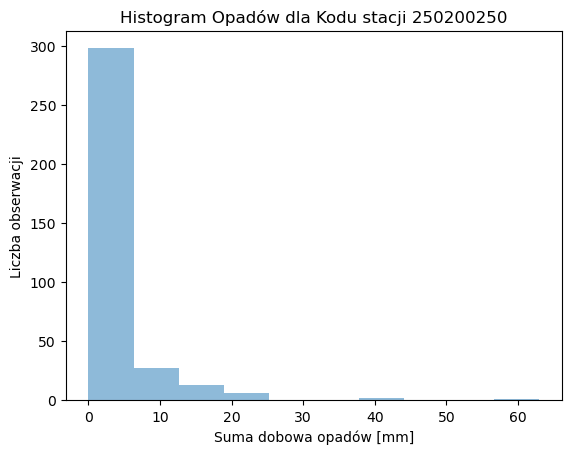

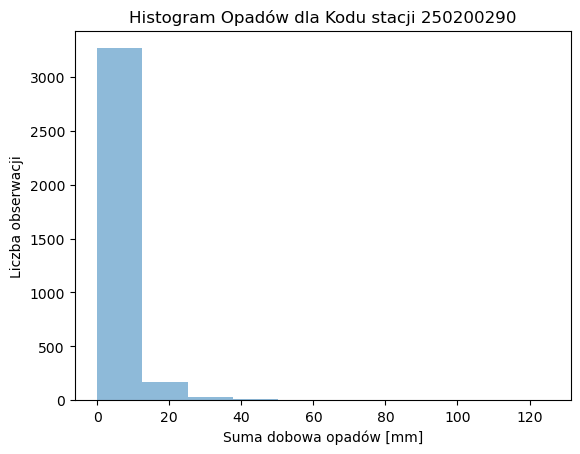

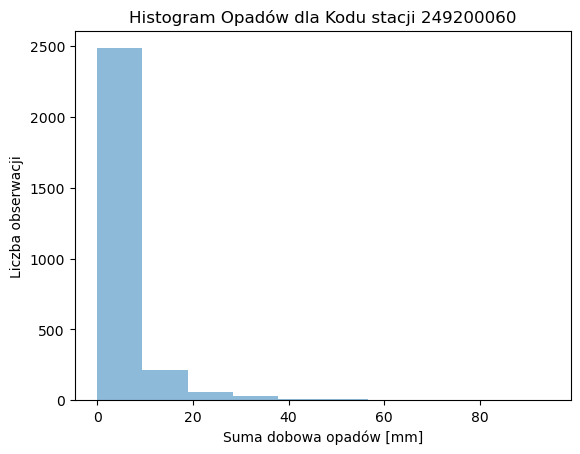

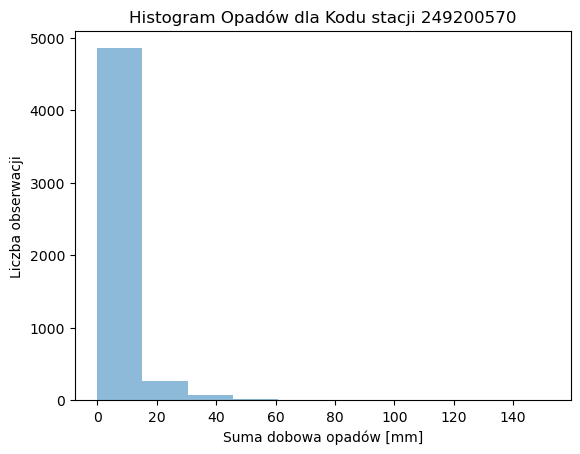

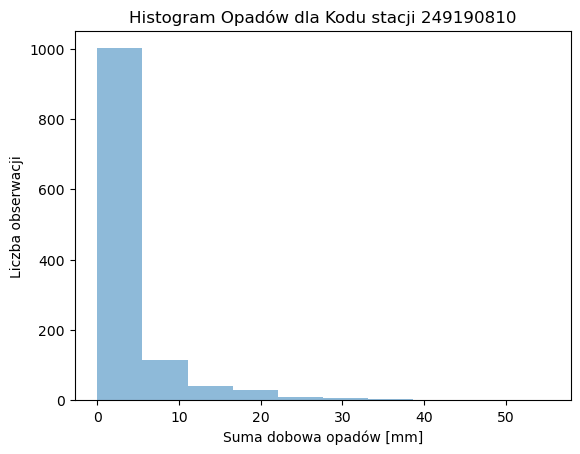

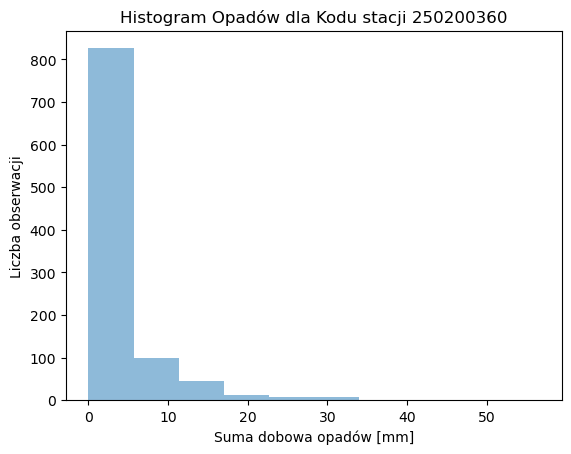

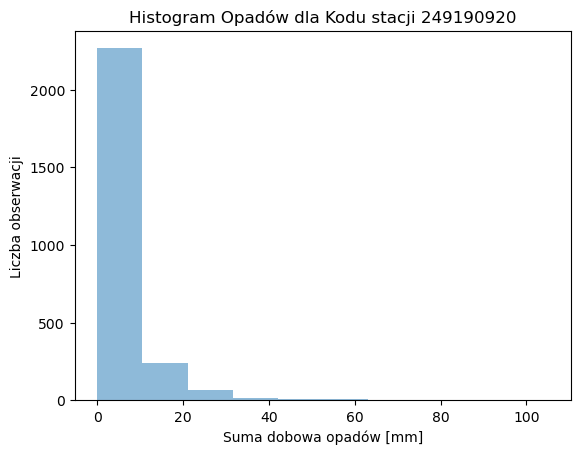

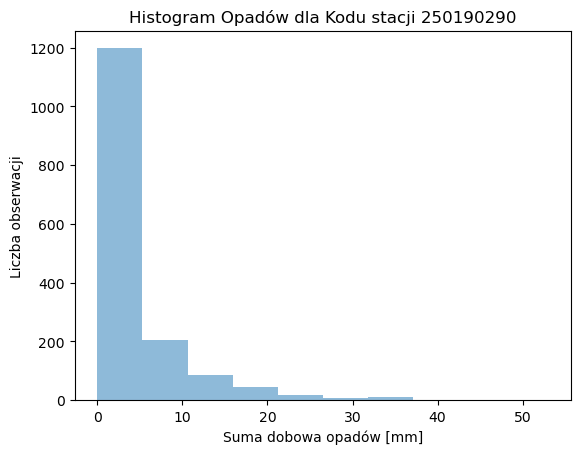

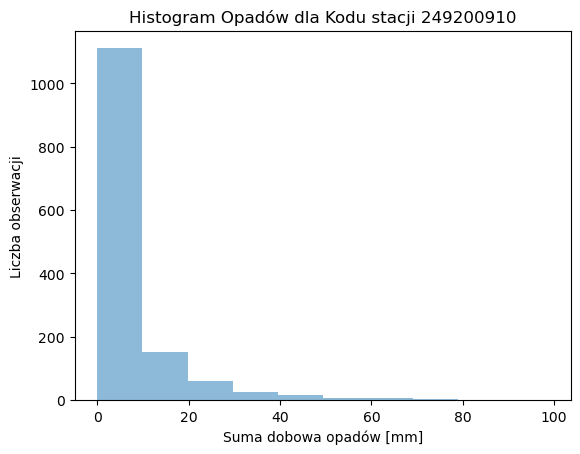

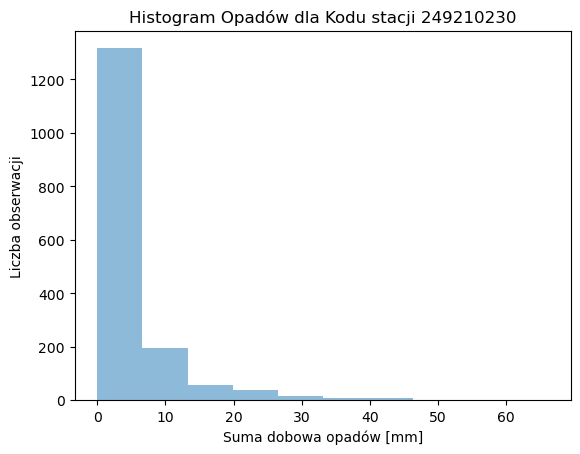

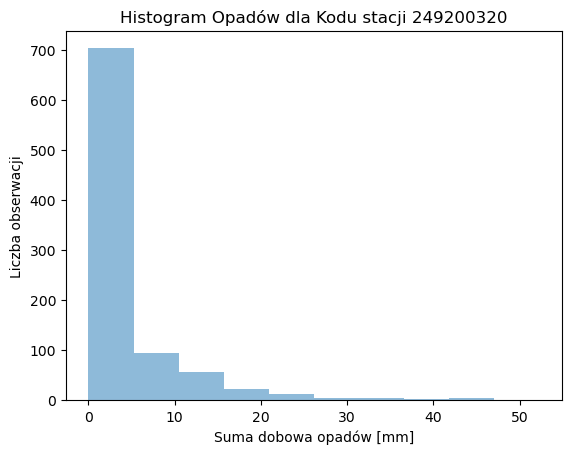

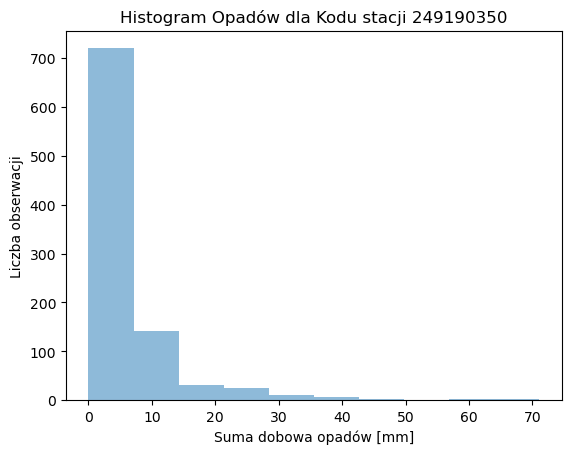

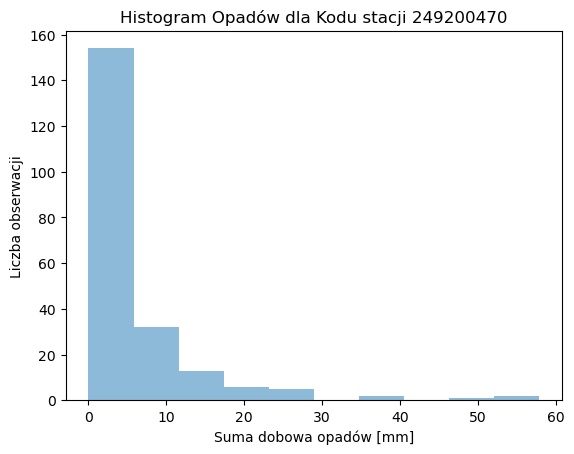

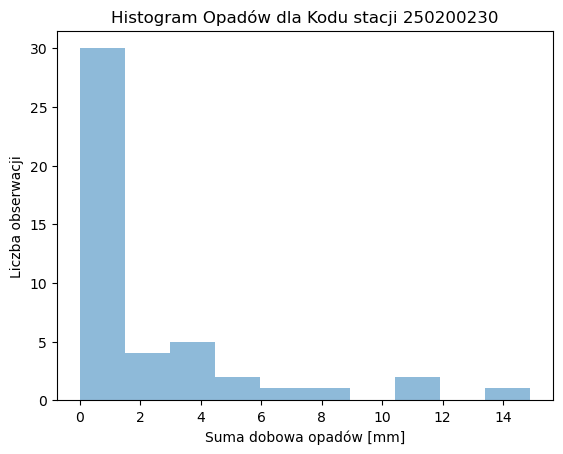

In [10]:
for ID in opady_malopolska['Kod stacji'].unique():
    # Wybierz dane dla danego ID
    data_for_ID = opady_malopolska[opady_malopolska['Kod stacji'] == ID]
    
    # Stwórz nowy wykres dla danego ID
    plt.figure()
    
    # Stwórz histogram dla kolumny "Opady" dla danego ID
    plt.hist(data_for_ID['Suma dobowa opadów [mm]'], bins=10, alpha=0.5)
    
    # Dodaj etykiety i tytuł
    plt.xlabel('Suma dobowa opadów [mm]')
    plt.ylabel('Liczba obserwacji')
    plt.title(f'Histogram Opadów dla Kodu stacji {ID}')
    
    # Pokaż histogram
    plt.show()



In [11]:
# # Pętla dla każdego unikalnego ID w kolumnie Kod stacji
# for station_code in opady_malopolska['Kod stacji'].unique():
#     # Wybierz dane dla danego kodu stacji
#     data_for_ID = opady_malopolska[opady_malopolska['Kod stacji'] == station_code]
    
#     # Określ maksymalną i minimalną datę
#     min_date = data_for_ID['Data'].min()
#     max_date = data_for_ID['Data'].max()
    
#     # Dodaj wszystkie brakujące daty dzienne
#     full_dates = pd.date_range(start=min_date, end=max_date, freq='D')
#     missing_dates = full_dates[~full_dates.isin(data_for_ID['Data'])]
    
#     # Utwórz ramkę danych z brakującymi datami
#     missing_data = pd.DataFrame({'Data': missing_dates, 'Kod stacji': station_code, 'Suma dobowa opadów [mm]': np.nan})
    
#     # Dołącz brakujące dane do oryginalnych danych
#     data_for_ID = pd.concat([data_for_ID, missing_data])
    
#     # Dodaj dodatkową datę na początku i na końcu
#     data_for_ID = data_for_ID.append({'Data': min_date - pd.Timedelta(days=1), 'Kod stacji': station_code, 'Suma dobowa opadów [mm]': np.nan}, ignore_index=True)
#     data_for_ID = data_for_ID.append({'Data': max_date + pd.Timedelta(days=1), 'Kod stacji': station_code, 'Suma dobowa opadów [mm]': np.nan}, ignore_index=True)
    
#     # Posortuj dane po dacie
#     data_for_ID = data_for_ID.sort_values(by='Data').reset_index(drop=True)
    
#     # Wypełnij brakujące wartości
#     np.random.seed(69)  # Ustaw ziarno losowości dla powtarzalności
#     filled_values = 3 * data_for_ID.groupby([data_for_ID['Data'].dt.year, data_for_ID['Data'].dt.day])['Suma dobowa opadów [mm]'].transform('median')
#     filled_values = filled_values.sample(n=len(data_for_ID), replace=True).reset_index(drop=True)
#     data_for_ID['Suma dobowa opadów [mm]'].fillna(filled_values, inplace=True)
    
#     # Stwórz wykres liniowy
#     plt.plot(data_for_ID['Data'], data_for_ID['Suma dobowa opadów [mm]'])
#     plt.xlabel('Data')
#     plt.ylabel('Suma dobowa opadów [mm]')
#     plt.title(f'Wykres liniowy danych dla kodu stacji {station_code}')
#     plt.show()


In [12]:
import pandas as pd

# Zainicjuj pustą listę do przechowywania danych
data_frames = []

# Pętla dla każdego unikalnego ID w kolumnie Kod stacji
for station_code in opady_malopolska['Kod stacji'].unique():
    # Wybierz dane dla danego kodu stacji
    data_for_ID = opady_malopolska[opady_malopolska['Kod stacji'] == station_code]
    
    # Określ maksymalną i minimalną datę
    min_date = data_for_ID['Data'].min()
    max_date = data_for_ID['Data'].max()
    
    # Dodaj wszystkie brakujące daty dzienne
    full_dates = pd.date_range(start=min_date, end=max_date, freq='D')
    missing_dates = full_dates[~full_dates.isin(data_for_ID['Data'])]
    
    # Utwórz ramkę danych z brakującymi datami
    missing_data = pd.DataFrame({'Data': missing_dates, 'Kod stacji': station_code, 'Suma dobowa opadów [mm]': np.nan})
    
    # Dołącz brakujące dane do oryginalnych danych
    data_for_ID = pd.concat([data_for_ID, missing_data])
    
    # Dodaj dodatkową datę na początku i na końcu
    data_for_ID = pd.concat([data_for_ID, pd.DataFrame({'Data': [min_date - pd.Timedelta(days=1), max_date + pd.Timedelta(days=1)], 
                                                        'Kod stacji': [station_code, station_code], 
                                                        'Suma dobowa opadów [mm]': [np.nan, np.nan]})], ignore_index=True)
    
    # Posortuj dane po dacie
    data_for_ID = data_for_ID.sort_values(by='Data').reset_index(drop=True)
    
    # Wypełnij brakujące wartości
    np.random.seed(69)  # Ustaw ziarno losowości dla powtarzalności
    filled_values = 3 * data_for_ID.groupby([data_for_ID['Data'].dt.year, data_for_ID['Data'].dt.day])['Suma dobowa opadów [mm]'].transform('median')
    filled_values = filled_values.sample(n=len(data_for_ID), replace=True).reset_index(drop=True)
    data_for_ID['Suma dobowa opadów [mm]'].fillna(filled_values, inplace=True)
    
    # Dodaj DataFrame do listy
    data_frames.append(data_for_ID)

# Połącz wszystkie ramki danych w jeden DataFrame
opady_malopolska_iniekcja = pd.concat(data_frames)

In [13]:
opady_malopolska_iniekcja

Kod stacji        Nazwa  Suma dobowa opadów [mm]       Data  \
0    249190010          NaN                     9.75 1990-12-31   
1    249190010  JAWISZOWICE                     0.10 1991-01-01   
2    249190010  JAWISZOWICE                     2.40 1991-01-02   
3    249190010  JAWISZOWICE                     4.70 1991-01-03   
4    249190010  JAWISZOWICE                     2.60 1991-01-04   
..         ...          ...                      ...        ...   
55   250200230          NaN                      NaN 2024-02-24   
56   250200230          NaN                     1.65 2024-02-25   
57   250200230     BORUSOWA                     0.00 2024-02-26   
58   250200230     BORUSOWA                     0.00 2024-02-27   
59   250200230          NaN                     1.65 2024-02-28   

   Szerokość geograficzna Długość geograficzna  \
0                     NaN                  NaN   
1                49 57 35             19 08 31   
2                49 57 35             19 08 31   
3                49 57 35             19 08 31   
4                49 57 35             19 08 31   
..                    ...                  ...   
55                    NaN                  NaN   
56                    NaN                  NaN   
57               50 16 40             20 47 13   
58               50 16 40             20 47 13   
59                    NaN                  NaN   

                                         geometry  Rzeka  Status pomiaru SMDB  \
0                                             NaN    NaN                  NaN   
1   POINT (19.141944444444444 49.959722222222226)  Wisła                  NaN   
2   POINT (19.141944444444444 49.959722222222226)  Wisła                  NaN   
3   POINT (19.141944444444444 49.959722222222226)  Wisła                  NaN   
4   POINT (19.141944444444444 49.959722222222226)  Wisła                  NaN   
..                                            ...    ...                  ...   
55                                            NaN    NaN                  NaN   
56                                            NaN    NaN                  NaN   
57   POINT (20.786944444444448 50.27777777777778)  Wisła                  NaN   
58   POINT (20.786944444444448 50.27777777777778)  Wisła                  NaN   
59                                            NaN    NaN                  NaN   

   Rodzaj opadu [S/W/ ]  Wysokość pokrywy śnieżnej [cm]  Status pomiaru PKSN  \
0                   NaN                             NaN                  NaN   
1                     W                             0.0                  8.0   
2                     W                             0.0                  8.0   
3                     W                             0.0                  8.0   
4                     W                             0.0                  8.0   
..                  ...                             ...                  ...   
55                  NaN                             NaN                  NaN   
56                  NaN                             NaN                  NaN   
57                    W                             0.0                  9.0   
58                    W                             0.0                  9.0   
59                  NaN                             NaN                  NaN   

    Wysokość świeżospałego śniegu [cm]  Status pomiaru HSS  \
0                                  NaN                 NaN   
1                                  0.0                 8.0   
2                                  0.0                 8.0   
3                                  0.0                 8.0   
4                                  0.0                 8.0   
..                                 ...                 ...   
55                                 NaN                 NaN   
56                                 NaN                 NaN   
57                                 0.0                 8.0   
58                                 0.0      

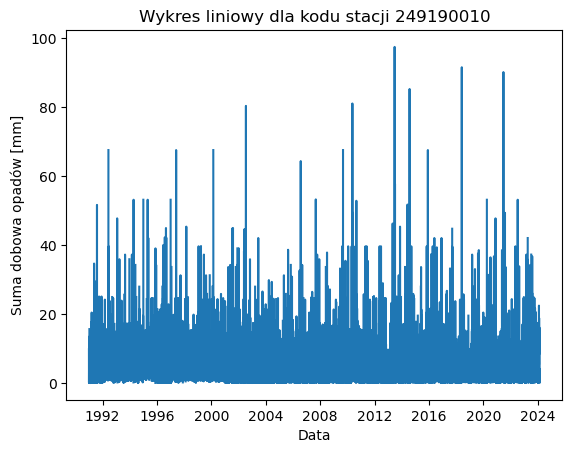

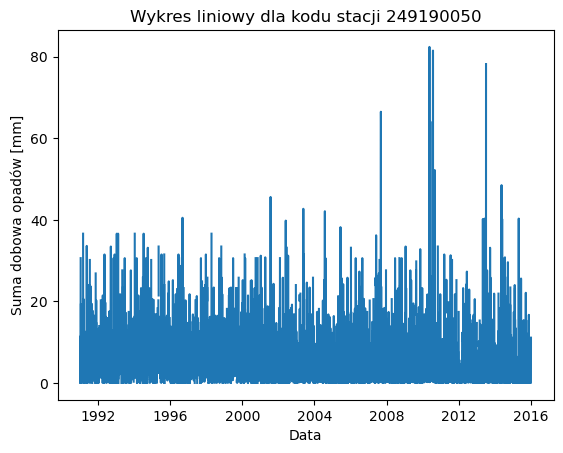

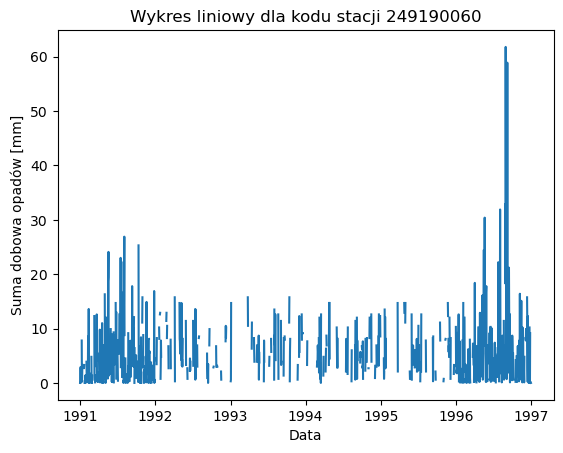

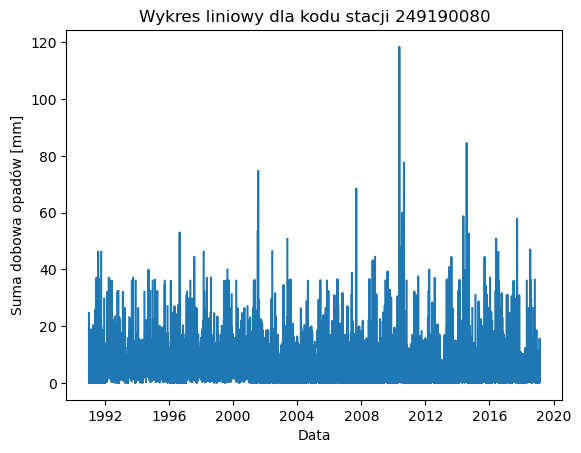

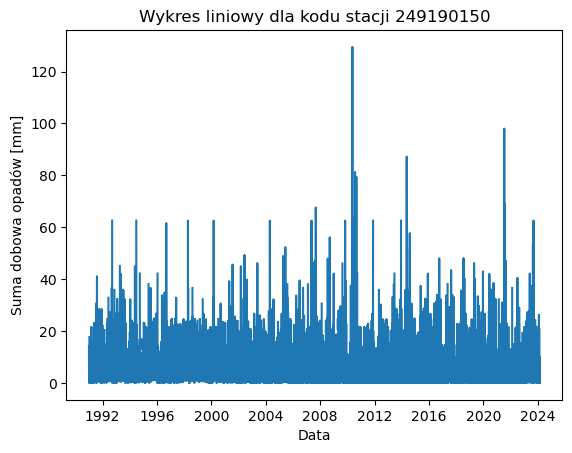

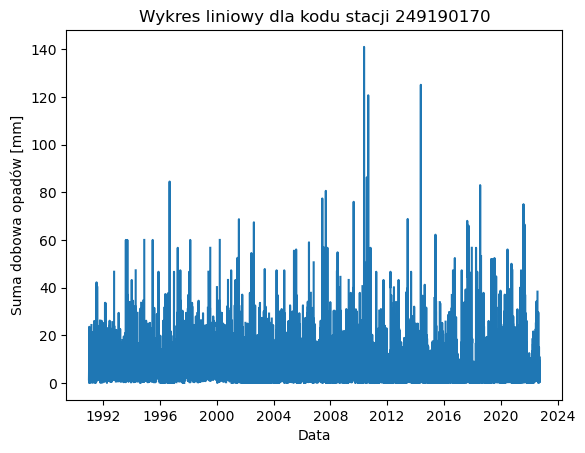

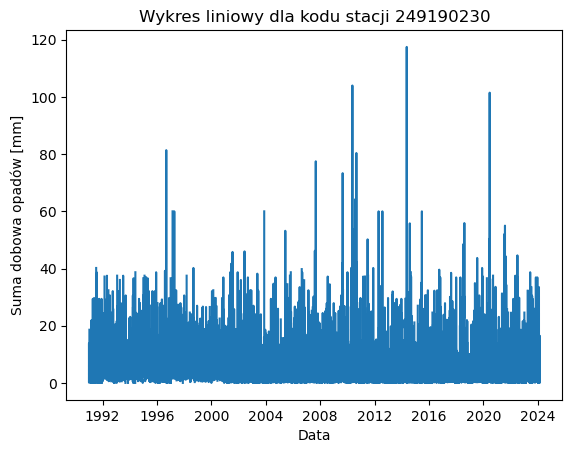

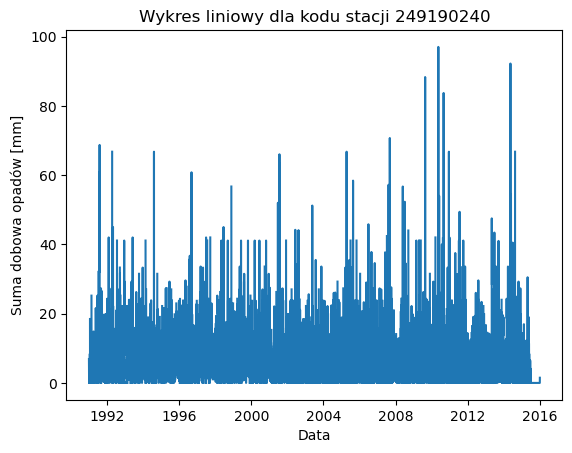

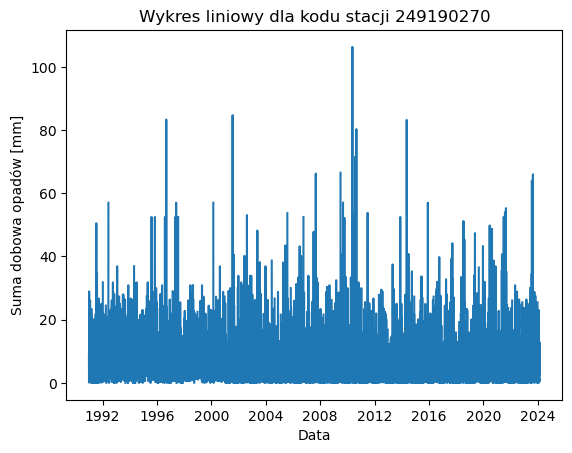

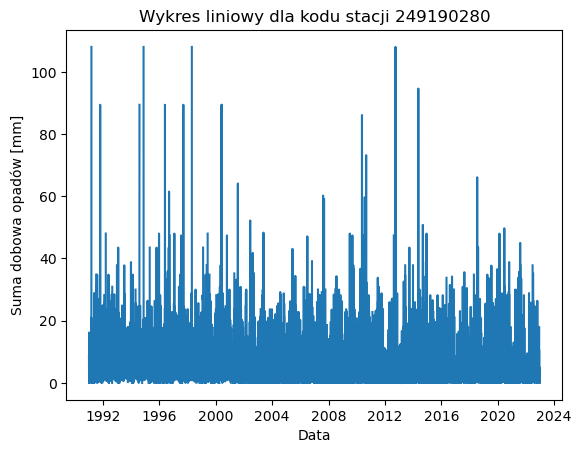

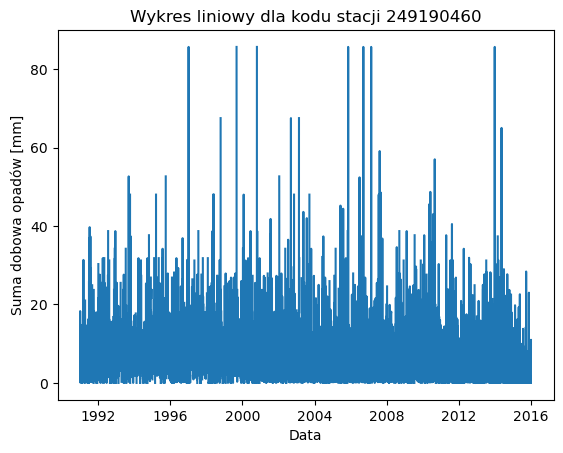

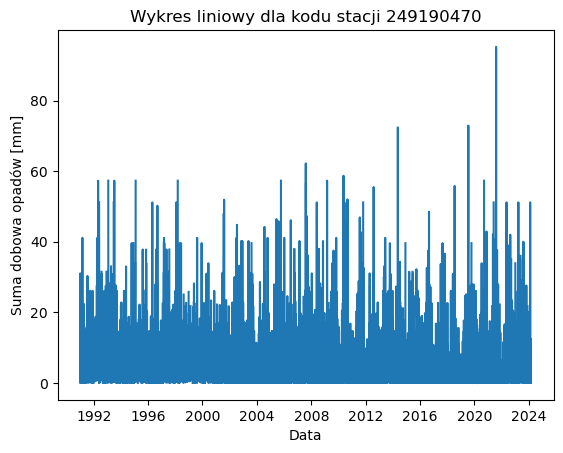

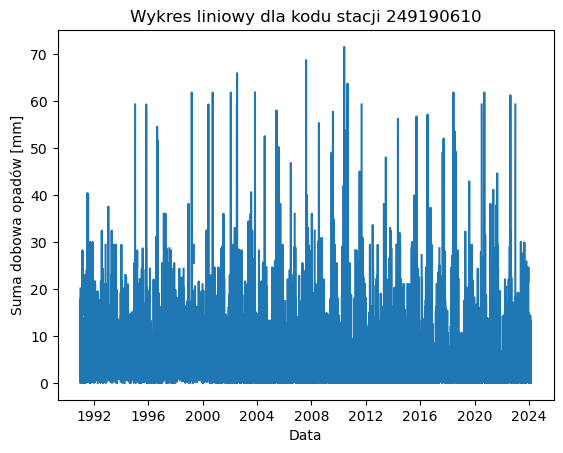

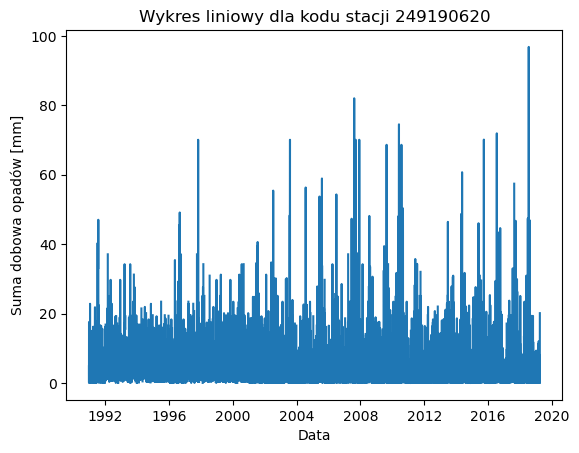

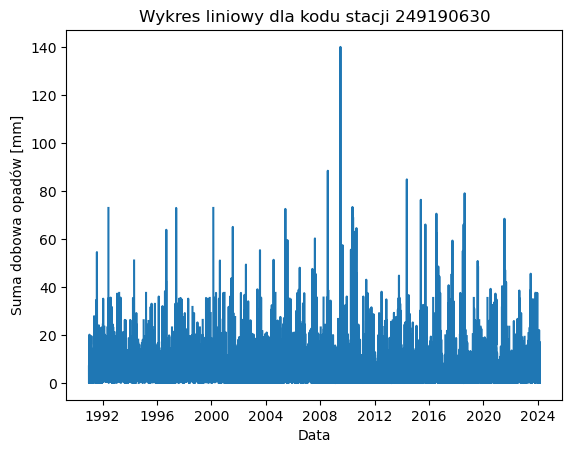

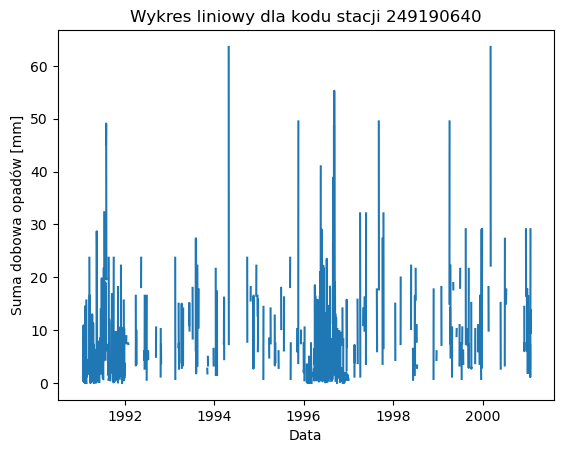

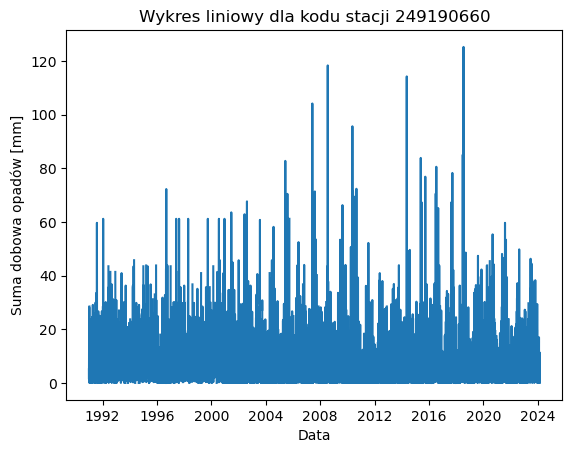

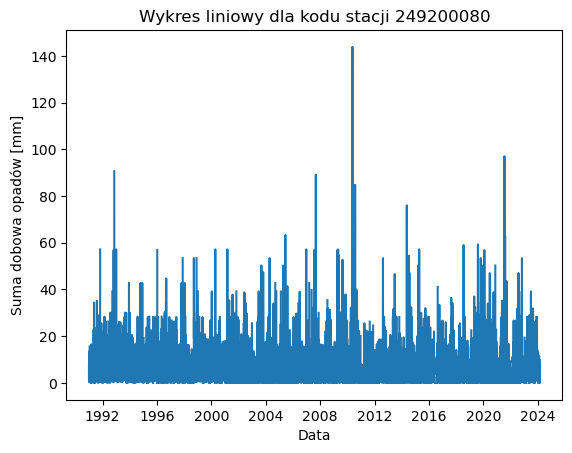

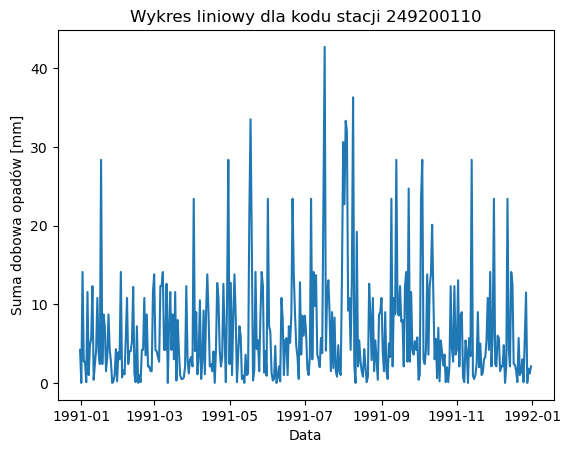

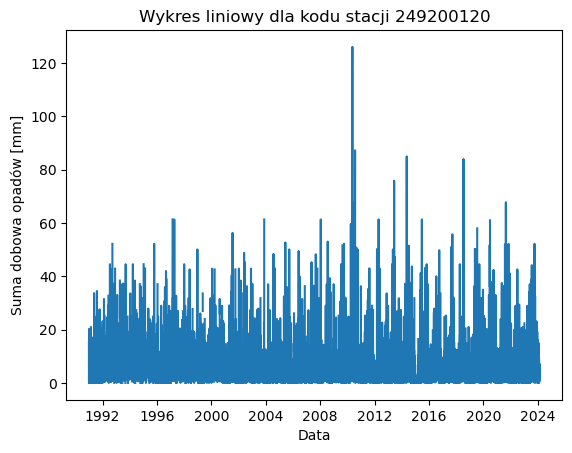

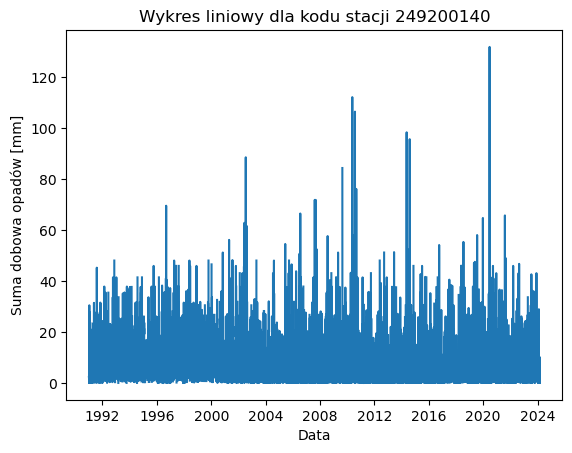

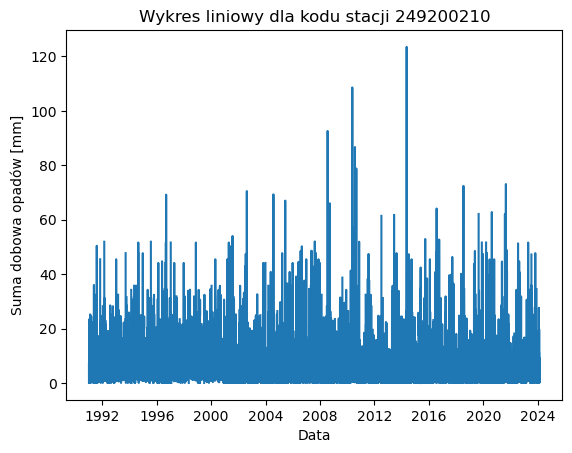

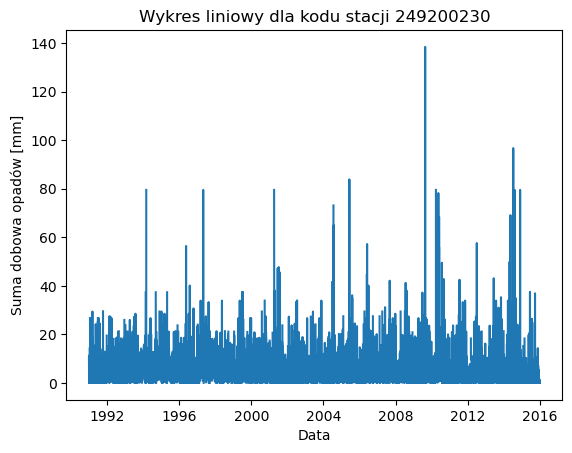

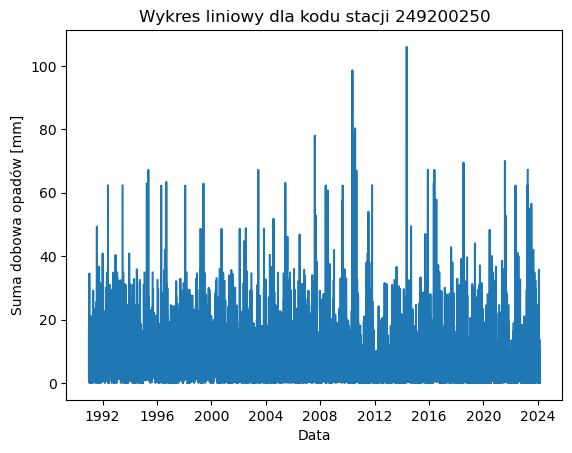

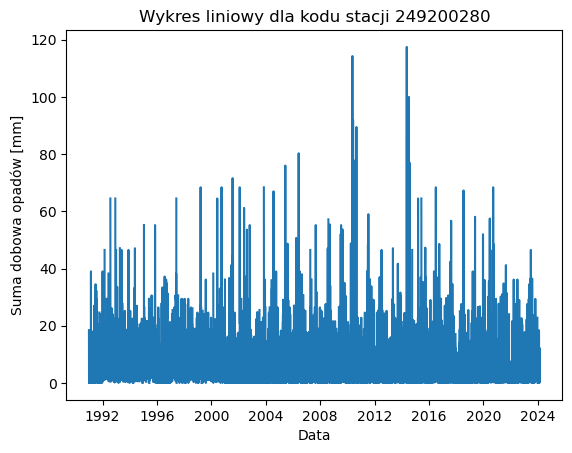

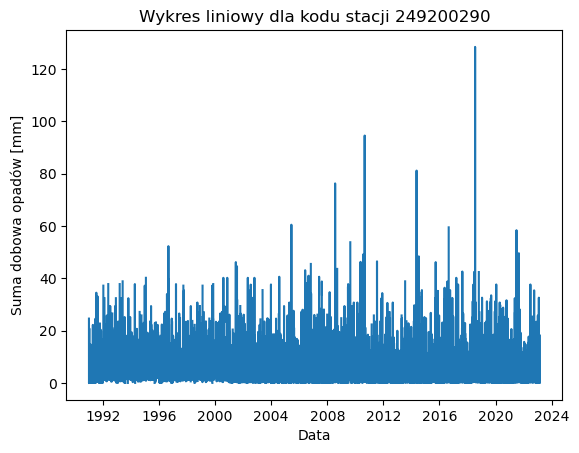

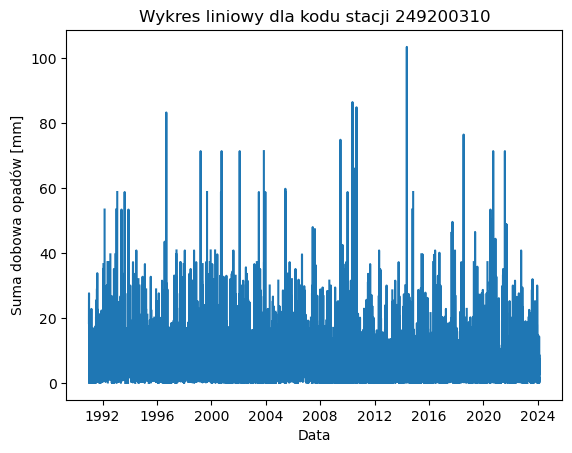

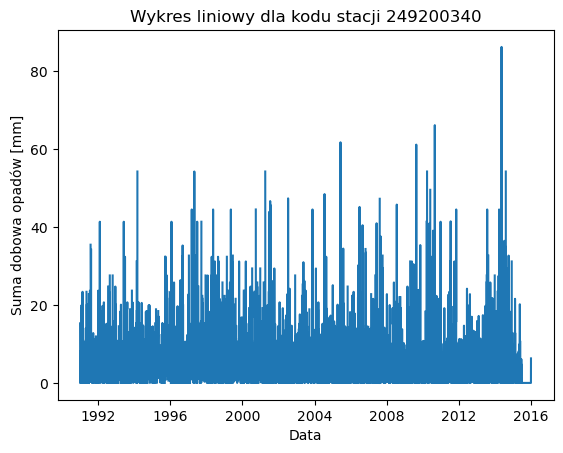

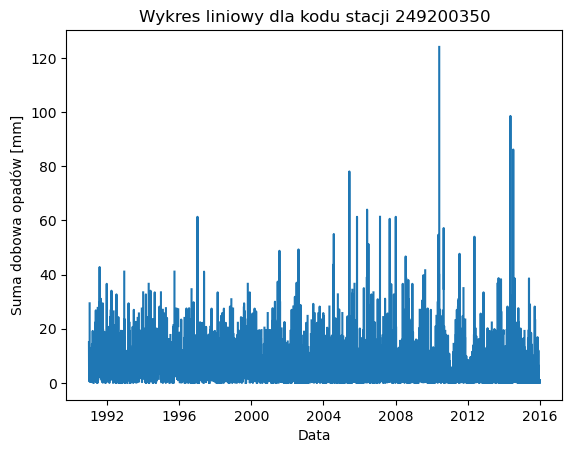

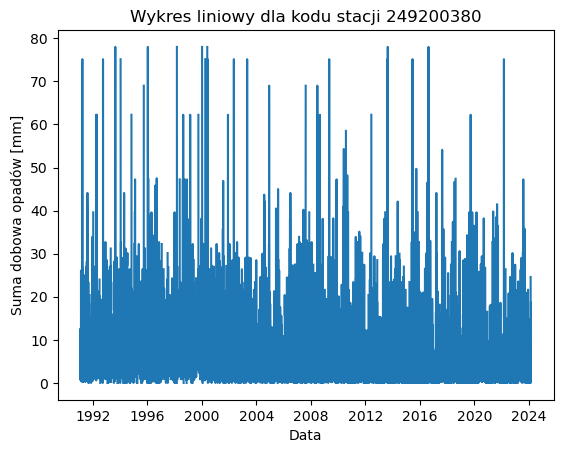

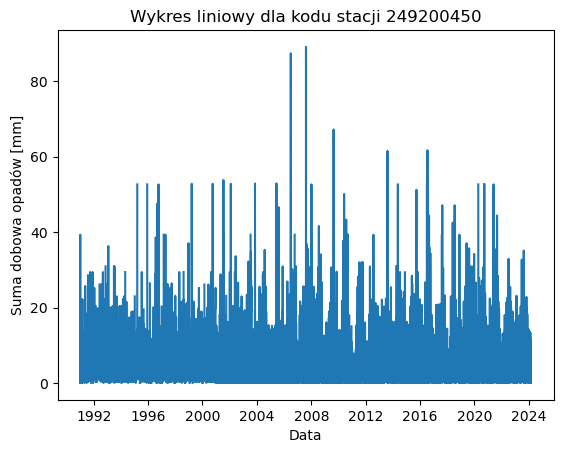

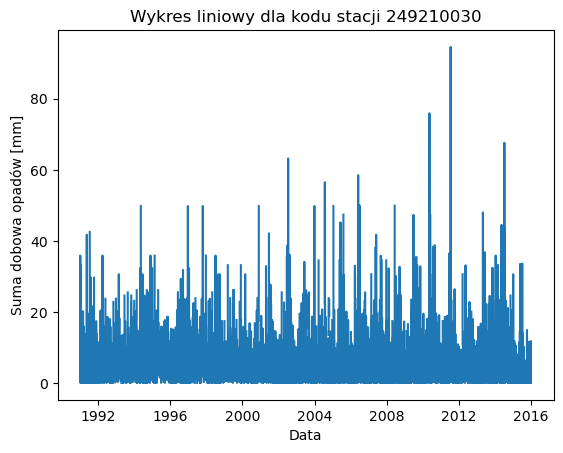

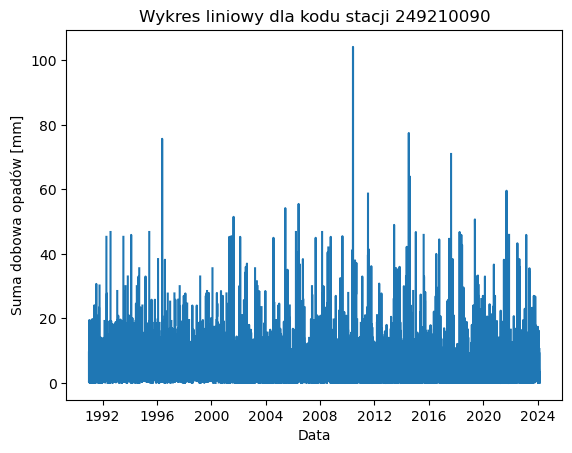

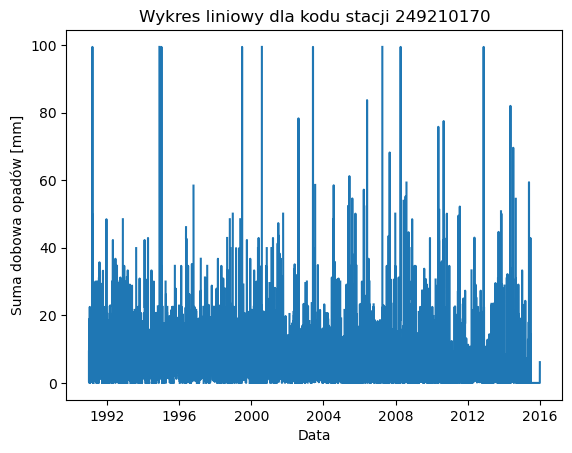

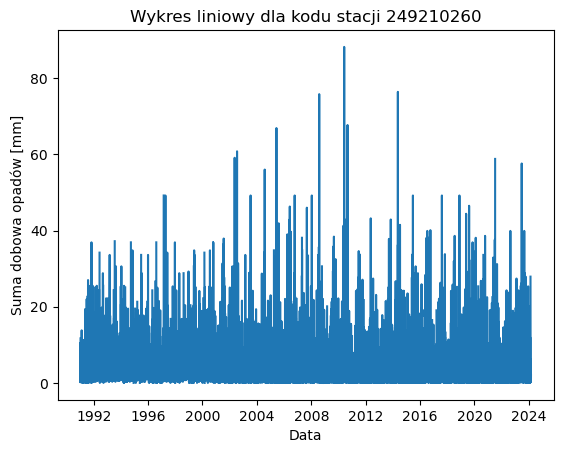

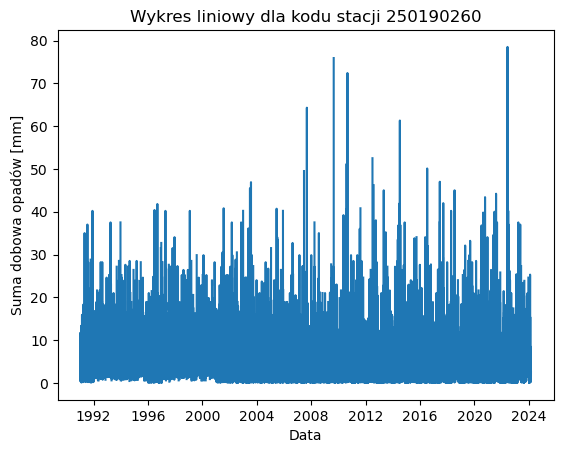

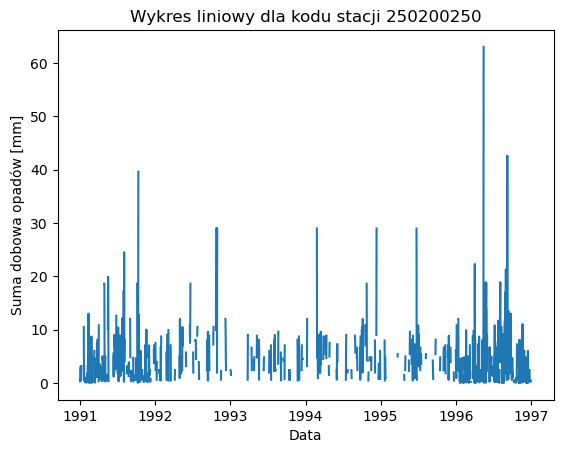

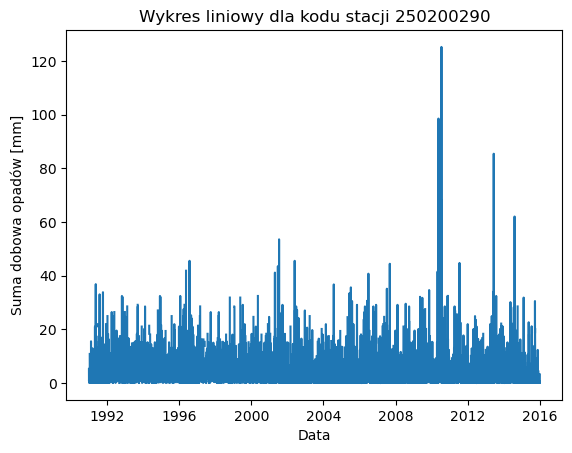

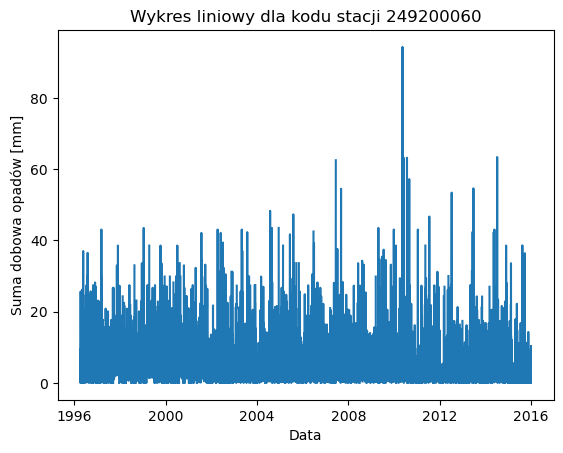

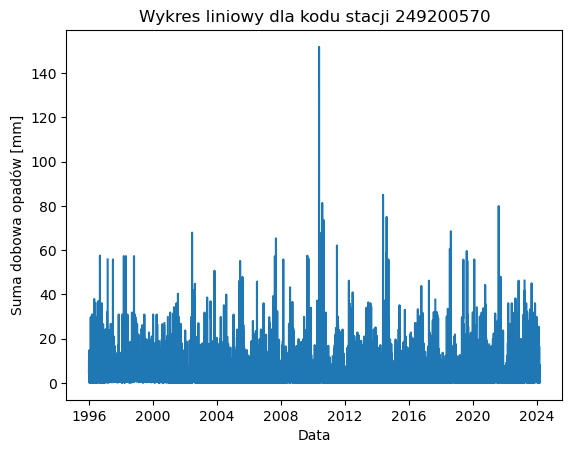

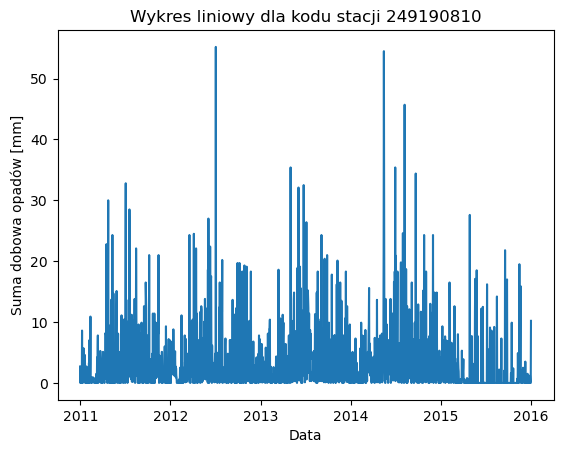

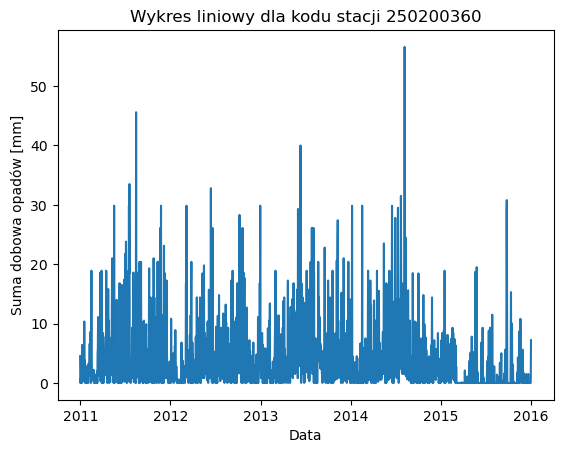

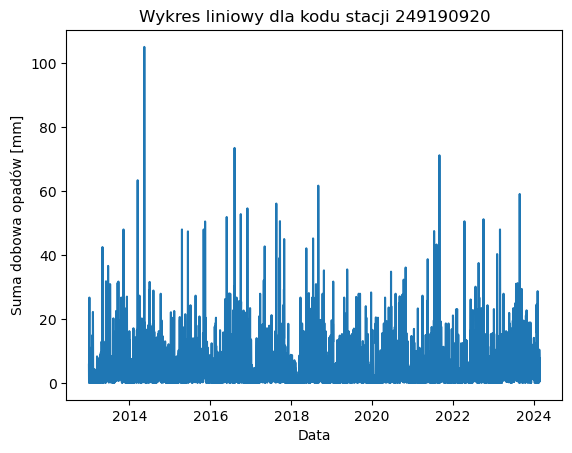

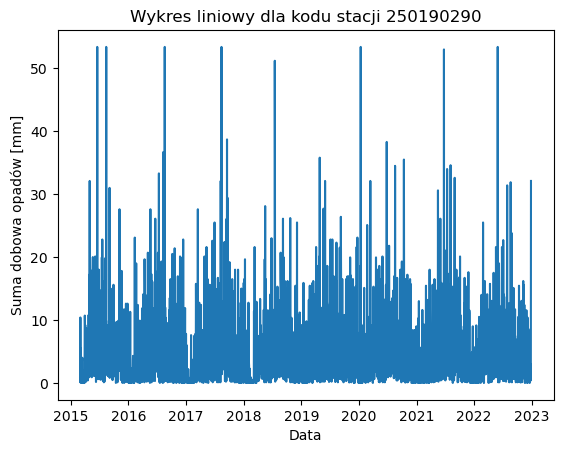

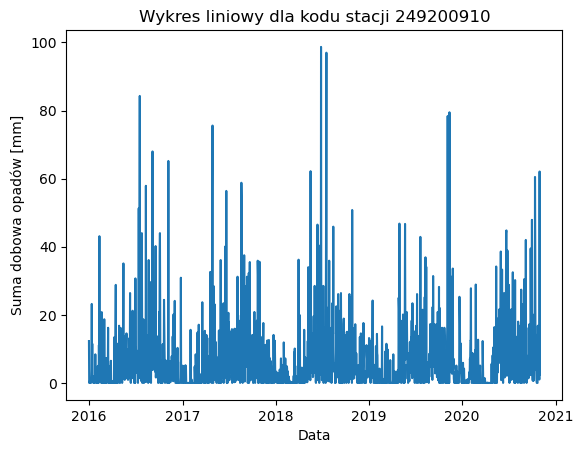

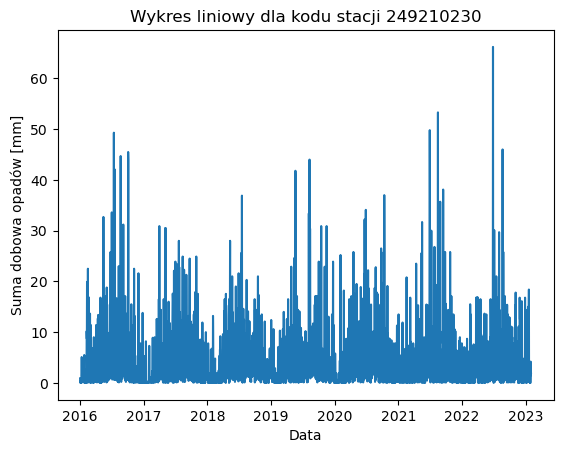

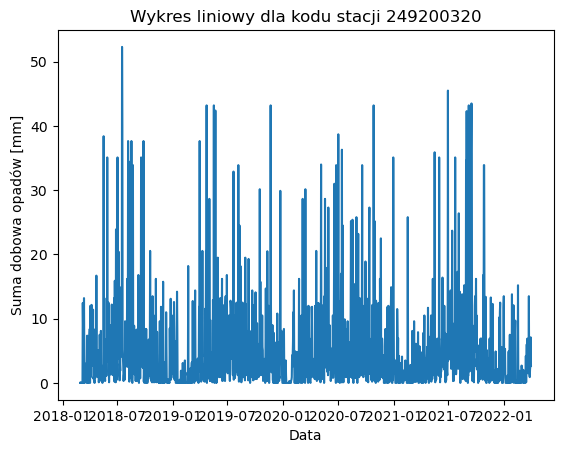

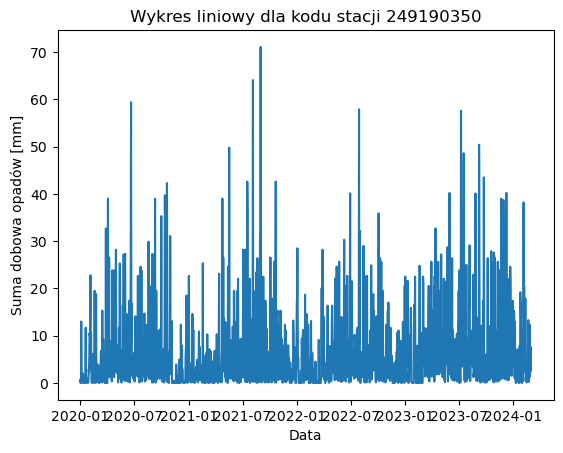

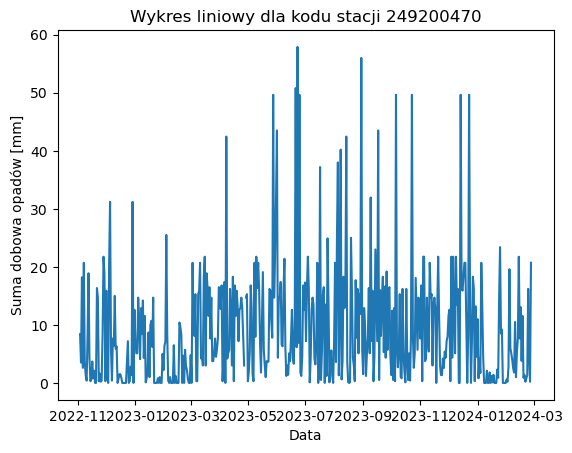

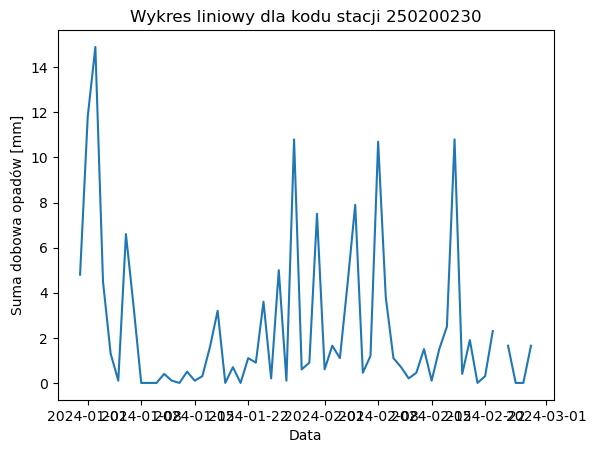

In [14]:
# Pętla dla każdego unikalnego ID w kolumnie Kod stacji
for station_code in opady_malopolska_iniekcja['Kod stacji'].unique():
    # Wybierz dane dla danego kodu stacji
    data_for_ID = opady_malopolska_iniekcja[opady_malopolska_iniekcja['Kod stacji'] == station_code]
    
    # Stwórz nowy wykres
    plt.figure()
    
    # Narysuj wykres liniowy
    plt.plot(data_for_ID['Data'], data_for_ID['Suma dobowa opadów [mm]'])
    
    # Dodaj etykiety osi
    plt.xlabel('Data')
    plt.ylabel('Suma dobowa opadów [mm]')
    
    # Dodaj tytuł
    plt.title(f'Wykres liniowy dla kodu stacji {station_code}')
    
    # Pokaż wykres
    plt.show()



In [15]:
opady_malopolska.to_csv('opady_malopolska.csv', index=False)

In [16]:
opady_malopolska_iniekcja.to_csv('opady_malopolska_iniekcja.csv', index=False)